In [1]:
import os
import sys

import warnings as warnings
warnings.filterwarnings(action='ignore')

import pandas as pd

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.2f}'.format # 소수점 유효숫자 표기법으로 안쓰기

import re

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
     
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

# 1. Data Load

In [2]:
data_folder = 'data2/'

In [3]:
%%time
train_df = pd.read_csv(os.path.join(data_folder,'train.csv'))
train_ability_df = pd.read_csv(os.path.join(data_folder,'train_Ability.csv'))

CPU times: user 52 s, sys: 36.9 s, total: 1min 28s
Wall time: 2min 11s


In [108]:
%%time
test_df = pd.read_csv(os.path.join(data_folder,'test.csv'))
# test_ability_df = pd.read_csv(os.path.join(data_folder,'test_Ability.csv'))

CPU times: user 19.2 s, sys: 6.26 s, total: 25.4 s
Wall time: 35.8 s


###### from 태환님

In [5]:
train_top100_unit_counts_ftr_df = pd.read_csv(os.path.join(data_folder, 'ftr_top100_unit_counts.csv'))
test_top100_unit_counts_ftr_df = pd.read_csv(os.path.join(data_folder, 'ftr_top100_unit_counts_test.csv'))

In [6]:
print(train_top100_unit_counts_ftr_df.shape)
print(test_top100_unit_counts_ftr_df.shape)

(38872, 201)
(16787, 201)


In [7]:
train_top100_unit_counts_ftr_df.head()

,game_id,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99
0,0,13,6,2,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,8,2,2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,31,2,5,0,4,2,0,0,0,1,2,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,12,3,3,1,0,1,0,1,1,0,0,1,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,30,3,3,1,3,1,0,1,1,2,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,102,14,0,5,2,0,2,0,1,0,4,0,1,1,1,1,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,38,18,2,3,1,3,1,0,1,3,3,0,1,2,1,5,0,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,2,5,13,0,1,0,1,0,0,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,18,4,2,1,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,42,3,0,2,2,1,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# train_top100_unit_counts_ftr_df = train_top100_unit_counts_ftr_df[['game_id','p0_u0','p0_u1','p0_u2','p0_u3','p0_u4','p1_u0','p1_u1','p1_u2','p1_u3','p1_u4']]


비율화

In [9]:
# train_top100_unit_counts_ftr_df['u0_ratio'] = train_top100_unit_counts_ftr_df.p0_u0 / (train_top100_unit_counts_ftr_df.p0_u0 + train_top100_unit_counts_ftr_df.p1_u0 + 0.00000001)
# train_top100_unit_counts_ftr_df['u1_ratio'] = train_top100_unit_counts_ftr_df.p0_u1 / (train_top100_unit_counts_ftr_df.p0_u1 + train_top100_unit_counts_ftr_df.p1_u1 + 0.00000001)
# train_top100_unit_counts_ftr_df['u2_ratio'] = train_top100_unit_counts_ftr_df.p0_u2 / (train_top100_unit_counts_ftr_df.p0_u2 + train_top100_unit_counts_ftr_df.p1_u2 + 0.00000001)
# train_top100_unit_counts_ftr_df['u3_ratio'] = train_top100_unit_counts_ftr_df.p0_u3 / (train_top100_unit_counts_ftr_df.p0_u3 + train_top100_unit_counts_ftr_df.p1_u3 + 0.00000001)
# train_top100_unit_counts_ftr_df['u4_ratio'] = train_top100_unit_counts_ftr_df.p0_u4 / (train_top100_unit_counts_ftr_df.p0_u4 + train_top100_unit_counts_ftr_df.p1_u4 + 0.00000001)
# train_top100_unit_counts_ftr_df['u5_ratio'] = train_top100_unit_counts_ftr_df.p0_u5 / (train_top100_unit_counts_ftr_df.p0_u5 + train_top100_unit_counts_ftr_df.p1_u5 + 0.00000001)
# train_top100_unit_counts_ftr_df['u6_ratio'] = train_top100_unit_counts_ftr_df.p0_u6 / (train_top100_unit_counts_ftr_df.p0_u6 + train_top100_unit_counts_ftr_df.p1_u6 + 0.00000001)
# train_top100_unit_counts_ftr_df['u7_ratio'] = train_top100_unit_counts_ftr_df.p0_u7 / (train_top100_unit_counts_ftr_df.p0_u7 + train_top100_unit_counts_ftr_df.p1_u7 + 0.00000001)
# train_top100_unit_counts_ftr_df['u8_ratio'] = train_top100_unit_counts_ftr_df.p0_u8 / (train_top100_unit_counts_ftr_df.p0_u8 + train_top100_unit_counts_ftr_df.p1_u8 + 0.00000001)
# train_top100_unit_counts_ftr_df['u9_ratio'] = train_top100_unit_counts_ftr_df.p0_u9 / (train_top100_unit_counts_ftr_df.p0_u9 + train_top100_unit_counts_ftr_df.p1_u9 + 0.00000001)
# train_top100_unit_counts_ftr_df['u10_ratio'] = train_top100_unit_counts_ftr_df.p0_u10 / (train_top100_unit_counts_ftr_df.p0_u10 + train_top100_unit_counts_ftr_df.p1_u10 + 0.00000001)
# train_top100_unit_counts_ftr_df['u11_ratio'] = train_top100_unit_counts_ftr_df.p0_u11 / (train_top100_unit_counts_ftr_df.p0_u11 + train_top100_unit_counts_ftr_df.p1_u11 + 0.00000001)
# train_top100_unit_counts_ftr_df['u12_ratio'] = train_top100_unit_counts_ftr_df.p0_u12 / (train_top100_unit_counts_ftr_df.p0_u12 + train_top100_unit_counts_ftr_df.p1_u12 + 0.00000001)
# train_top100_unit_counts_ftr_df['u13_ratio'] = train_top100_unit_counts_ftr_df.p0_u13 / (train_top100_unit_counts_ftr_df.p0_u13 + train_top100_unit_counts_ftr_df.p1_u13 + 0.00000001)
# train_top100_unit_counts_ftr_df['u14_ratio'] = train_top100_unit_counts_ftr_df.p0_u14 / (train_top100_unit_counts_ftr_df.p0_u14 + train_top100_unit_counts_ftr_df.p1_u14 + 0.00000001)
# train_top100_unit_counts_ftr_df['u15_ratio'] = train_top100_unit_counts_ftr_df.p0_u15 / (train_top100_unit_counts_ftr_df.p0_u15 + train_top100_unit_counts_ftr_df.p1_u15 + 0.00000001)
# train_top100_unit_counts_ftr_df['u16_ratio'] = train_top100_unit_counts_ftr_df.p0_u16 / (train_top100_unit_counts_ftr_df.p0_u16 + train_top100_unit_counts_ftr_df.p1_u16 + 0.00000001)
# train_top100_unit_counts_ftr_df['u17_ratio'] = train_top100_unit_counts_ftr_df.p0_u17 / (train_top100_unit_counts_ftr_df.p0_u17 + train_top100_unit_counts_ftr_df.p1_u17 + 0.00000001)
# train_top100_unit_counts_ftr_df['u18_ratio'] = train_top100_unit_counts_ftr_df.p0_u18 / (train_top100_unit_counts_ftr_df.p0_u18 + train_top100_unit_counts_ftr_df.p1_u18 + 0.00000001)
# train_top100_unit_counts_ftr_df['u19_ratio'] = train_top100_unit_counts_ftr_df.p0_u19 / (train_top100_unit_counts_ftr_df.p0_u19 + train_top100_unit_counts_ftr_df.p1_u19 + 0.00000001)
# train_top100_unit_counts_ftr_df['u20_ratio'] = train_top100_unit_counts_ftr_df.p0_u20 / (train_top100_unit_counts_ftr_df.p0_u20 + train_top100_unit_counts_ftr_df.p1_u20 + 0.00000001)
# train_top100_unit_counts_ftr_df['u21_ratio'] = train_top100_unit_counts_ftr_df.p0_u21 / (train_top100_unit_counts_ftr_df.p0_u21 + train_top100_unit_counts_ftr_df.p1_u21 + 0.00000001)
# train_top100_unit_counts_ftr_df['u22_ratio'] = train_top100_unit_counts_ftr_df.p0_u22 / (train_top100_unit_counts_ftr_df.p0_u22 + train_top100_unit_counts_ftr_df.p1_u22 + 0.00000001)
# train_top100_unit_counts_ftr_df['u23_ratio'] = train_top100_unit_counts_ftr_df.p0_u23 / (train_top100_unit_counts_ftr_df.p0_u23 + train_top100_unit_counts_ftr_df.p1_u23 + 0.00000001)
# train_top100_unit_counts_ftr_df['u24_ratio'] = train_top100_unit_counts_ftr_df.p0_u24 / (train_top100_unit_counts_ftr_df.p0_u24 + train_top100_unit_counts_ftr_df.p1_u24 + 0.00000001)
# train_top100_unit_counts_ftr_df['u25_ratio'] = train_top100_unit_counts_ftr_df.p0_u25 / (train_top100_unit_counts_ftr_df.p0_u25 + train_top100_unit_counts_ftr_df.p1_u25 + 0.00000001)
# train_top100_unit_counts_ftr_df['u26_ratio'] = train_top100_unit_counts_ftr_df.p0_u26 / (train_top100_unit_counts_ftr_df.p0_u26 + train_top100_unit_counts_ftr_df.p1_u26 + 0.00000001)
# train_top100_unit_counts_ftr_df['u27_ratio'] = train_top100_unit_counts_ftr_df.p0_u27 / (train_top100_unit_counts_ftr_df.p0_u27 + train_top100_unit_counts_ftr_df.p1_u27 + 0.00000001)
# train_top100_unit_counts_ftr_df['u28_ratio'] = train_top100_unit_counts_ftr_df.p0_u28 / (train_top100_unit_counts_ftr_df.p0_u28 + train_top100_unit_counts_ftr_df.p1_u28 + 0.00000001)
# train_top100_unit_counts_ftr_df['u29_ratio'] = train_top100_unit_counts_ftr_df.p0_u29 / (train_top100_unit_counts_ftr_df.p0_u29 + train_top100_unit_counts_ftr_df.p1_u29 + 0.00000001)
# train_top100_unit_counts_ftr_df['u30_ratio'] = train_top100_unit_counts_ftr_df.p0_u30 / (train_top100_unit_counts_ftr_df.p0_u30 + train_top100_unit_counts_ftr_df.p1_u30 + 0.00000001)
# train_top100_unit_counts_ftr_df['u31_ratio'] = train_top100_unit_counts_ftr_df.p0_u31 / (train_top100_unit_counts_ftr_df.p0_u31 + train_top100_unit_counts_ftr_df.p1_u31 + 0.00000001)
# train_top100_unit_counts_ftr_df['u32_ratio'] = train_top100_unit_counts_ftr_df.p0_u32 / (train_top100_unit_counts_ftr_df.p0_u32 + train_top100_unit_counts_ftr_df.p1_u32 + 0.00000001)
# train_top100_unit_counts_ftr_df['u33_ratio'] = train_top100_unit_counts_ftr_df.p0_u33 / (train_top100_unit_counts_ftr_df.p0_u33 + train_top100_unit_counts_ftr_df.p1_u33 + 0.00000001)
# train_top100_unit_counts_ftr_df['u34_ratio'] = train_top100_unit_counts_ftr_df.p0_u34 / (train_top100_unit_counts_ftr_df.p0_u34 + train_top100_unit_counts_ftr_df.p1_u34 + 0.00000001)
# train_top100_unit_counts_ftr_df['u35_ratio'] = train_top100_unit_counts_ftr_df.p0_u35 / (train_top100_unit_counts_ftr_df.p0_u35 + train_top100_unit_counts_ftr_df.p1_u35 + 0.00000001)
# train_top100_unit_counts_ftr_df['u36_ratio'] = train_top100_unit_counts_ftr_df.p0_u36 / (train_top100_unit_counts_ftr_df.p0_u36 + train_top100_unit_counts_ftr_df.p1_u36 + 0.00000001)
# train_top100_unit_counts_ftr_df['u37_ratio'] = train_top100_unit_counts_ftr_df.p0_u37 / (train_top100_unit_counts_ftr_df.p0_u37 + train_top100_unit_counts_ftr_df.p1_u37 + 0.00000001)
# train_top100_unit_counts_ftr_df['u38_ratio'] = train_top100_unit_counts_ftr_df.p0_u38 / (train_top100_unit_counts_ftr_df.p0_u38 + train_top100_unit_counts_ftr_df.p1_u38 + 0.00000001)
# train_top100_unit_counts_ftr_df['u39_ratio'] = train_top100_unit_counts_ftr_df.p0_u39 / (train_top100_unit_counts_ftr_df.p0_u39 + train_top100_unit_counts_ftr_df.p1_u39 + 0.00000001)
# train_top100_unit_counts_ftr_df['u40_ratio'] = train_top100_unit_counts_ftr_df.p0_u40 / (train_top100_unit_counts_ftr_df.p0_u40 + train_top100_unit_counts_ftr_df.p1_u40 + 0.00000001)
# train_top100_unit_counts_ftr_df['u41_ratio'] = train_top100_unit_counts_ftr_df.p0_u41 / (train_top100_unit_counts_ftr_df.p0_u41 + train_top100_unit_counts_ftr_df.p1_u41 + 0.00000001)
# train_top100_unit_counts_ftr_df['u42_ratio'] = train_top100_unit_counts_ftr_df.p0_u42 / (train_top100_unit_counts_ftr_df.p0_u42 + train_top100_unit_counts_ftr_df.p1_u42 + 0.00000001)
# train_top100_unit_counts_ftr_df['u43_ratio'] = train_top100_unit_counts_ftr_df.p0_u43 / (train_top100_unit_counts_ftr_df.p0_u43 + train_top100_unit_counts_ftr_df.p1_u43 + 0.00000001)
# train_top100_unit_counts_ftr_df['u44_ratio'] = train_top100_unit_counts_ftr_df.p0_u44 / (train_top100_unit_counts_ftr_df.p0_u44 + train_top100_unit_counts_ftr_df.p1_u44 + 0.00000001)
# train_top100_unit_counts_ftr_df['u45_ratio'] = train_top100_unit_counts_ftr_df.p0_u45 / (train_top100_unit_counts_ftr_df.p0_u45 + train_top100_unit_counts_ftr_df.p1_u45 + 0.00000001)
# train_top100_unit_counts_ftr_df['u46_ratio'] = train_top100_unit_counts_ftr_df.p0_u46 / (train_top100_unit_counts_ftr_df.p0_u46 + train_top100_unit_counts_ftr_df.p1_u46 + 0.00000001)
# train_top100_unit_counts_ftr_df['u47_ratio'] = train_top100_unit_counts_ftr_df.p0_u47 / (train_top100_unit_counts_ftr_df.p0_u47 + train_top100_unit_counts_ftr_df.p1_u47 + 0.00000001)
# train_top100_unit_counts_ftr_df['u48_ratio'] = train_top100_unit_counts_ftr_df.p0_u48 / (train_top100_unit_counts_ftr_df.p0_u48 + train_top100_unit_counts_ftr_df.p1_u48 + 0.00000001)
# train_top100_unit_counts_ftr_df['u49_ratio'] = train_top100_unit_counts_ftr_df.p0_u49 / (train_top100_unit_counts_ftr_df.p0_u49 + train_top100_unit_counts_ftr_df.p1_u49 + 0.00000001)
# train_top100_unit_counts_ftr_df['u50_ratio'] = train_top100_unit_counts_ftr_df.p0_u50 / (train_top100_unit_counts_ftr_df.p0_u50 + train_top100_unit_counts_ftr_df.p1_u50 + 0.00000001)
# train_top100_unit_counts_ftr_df['u51_ratio'] = train_top100_unit_counts_ftr_df.p0_u51 / (train_top100_unit_counts_ftr_df.p0_u51 + train_top100_unit_counts_ftr_df.p1_u51 + 0.00000001)
# train_top100_unit_counts_ftr_df['u52_ratio'] = train_top100_unit_counts_ftr_df.p0_u52 / (train_top100_unit_counts_ftr_df.p0_u52 + train_top100_unit_counts_ftr_df.p1_u52 + 0.00000001)
# train_top100_unit_counts_ftr_df['u53_ratio'] = train_top100_unit_counts_ftr_df.p0_u53 / (train_top100_unit_counts_ftr_df.p0_u53 + train_top100_unit_counts_ftr_df.p1_u53 + 0.00000001)
# train_top100_unit_counts_ftr_df['u54_ratio'] = train_top100_unit_counts_ftr_df.p0_u54 / (train_top100_unit_counts_ftr_df.p0_u54 + train_top100_unit_counts_ftr_df.p1_u54 + 0.00000001)
# train_top100_unit_counts_ftr_df['u55_ratio'] = train_top100_unit_counts_ftr_df.p0_u55 / (train_top100_unit_counts_ftr_df.p0_u55 + train_top100_unit_counts_ftr_df.p1_u55 + 0.00000001)
# train_top100_unit_counts_ftr_df['u56_ratio'] = train_top100_unit_counts_ftr_df.p0_u56 / (train_top100_unit_counts_ftr_df.p0_u56 + train_top100_unit_counts_ftr_df.p1_u56 + 0.00000001)
# train_top100_unit_counts_ftr_df['u57_ratio'] = train_top100_unit_counts_ftr_df.p0_u57 / (train_top100_unit_counts_ftr_df.p0_u57 + train_top100_unit_counts_ftr_df.p1_u57 + 0.00000001)
# train_top100_unit_counts_ftr_df['u58_ratio'] = train_top100_unit_counts_ftr_df.p0_u58 / (train_top100_unit_counts_ftr_df.p0_u58 + train_top100_unit_counts_ftr_df.p1_u58 + 0.00000001)
# train_top100_unit_counts_ftr_df['u59_ratio'] = train_top100_unit_counts_ftr_df.p0_u59 / (train_top100_unit_counts_ftr_df.p0_u59 + train_top100_unit_counts_ftr_df.p1_u59 + 0.00000001)
# train_top100_unit_counts_ftr_df['u60_ratio'] = train_top100_unit_counts_ftr_df.p0_u60 / (train_top100_unit_counts_ftr_df.p0_u60 + train_top100_unit_counts_ftr_df.p1_u60 + 0.00000001)
# train_top100_unit_counts_ftr_df['u61_ratio'] = train_top100_unit_counts_ftr_df.p0_u61 / (train_top100_unit_counts_ftr_df.p0_u61 + train_top100_unit_counts_ftr_df.p1_u61 + 0.00000001)
# train_top100_unit_counts_ftr_df['u62_ratio'] = train_top100_unit_counts_ftr_df.p0_u62 / (train_top100_unit_counts_ftr_df.p0_u62 + train_top100_unit_counts_ftr_df.p1_u62 + 0.00000001)
# train_top100_unit_counts_ftr_df['u63_ratio'] = train_top100_unit_counts_ftr_df.p0_u63 / (train_top100_unit_counts_ftr_df.p0_u63 + train_top100_unit_counts_ftr_df.p1_u63 + 0.00000001)
# train_top100_unit_counts_ftr_df['u64_ratio'] = train_top100_unit_counts_ftr_df.p0_u64 / (train_top100_unit_counts_ftr_df.p0_u64 + train_top100_unit_counts_ftr_df.p1_u64 + 0.00000001)
# train_top100_unit_counts_ftr_df['u65_ratio'] = train_top100_unit_counts_ftr_df.p0_u65 / (train_top100_unit_counts_ftr_df.p0_u65 + train_top100_unit_counts_ftr_df.p1_u65 + 0.00000001)
# train_top100_unit_counts_ftr_df['u66_ratio'] = train_top100_unit_counts_ftr_df.p0_u66 / (train_top100_unit_counts_ftr_df.p0_u66 + train_top100_unit_counts_ftr_df.p1_u66 + 0.00000001)
# train_top100_unit_counts_ftr_df['u67_ratio'] = train_top100_unit_counts_ftr_df.p0_u67 / (train_top100_unit_counts_ftr_df.p0_u67 + train_top100_unit_counts_ftr_df.p1_u67 + 0.00000001)
# train_top100_unit_counts_ftr_df['u68_ratio'] = train_top100_unit_counts_ftr_df.p0_u68 / (train_top100_unit_counts_ftr_df.p0_u68 + train_top100_unit_counts_ftr_df.p1_u68 + 0.00000001)
# train_top100_unit_counts_ftr_df['u69_ratio'] = train_top100_unit_counts_ftr_df.p0_u69 / (train_top100_unit_counts_ftr_df.p0_u69 + train_top100_unit_counts_ftr_df.p1_u69 + 0.00000001)
# train_top100_unit_counts_ftr_df['u70_ratio'] = train_top100_unit_counts_ftr_df.p0_u70 / (train_top100_unit_counts_ftr_df.p0_u70 + train_top100_unit_counts_ftr_df.p1_u70 + 0.00000001)
# train_top100_unit_counts_ftr_df['u71_ratio'] = train_top100_unit_counts_ftr_df.p0_u71 / (train_top100_unit_counts_ftr_df.p0_u71 + train_top100_unit_counts_ftr_df.p1_u71 + 0.00000001)
# train_top100_unit_counts_ftr_df['u72_ratio'] = train_top100_unit_counts_ftr_df.p0_u72 / (train_top100_unit_counts_ftr_df.p0_u72 + train_top100_unit_counts_ftr_df.p1_u72 + 0.00000001)
# train_top100_unit_counts_ftr_df['u73_ratio'] = train_top100_unit_counts_ftr_df.p0_u73 / (train_top100_unit_counts_ftr_df.p0_u73 + train_top100_unit_counts_ftr_df.p1_u73 + 0.00000001)
# train_top100_unit_counts_ftr_df['u74_ratio'] = train_top100_unit_counts_ftr_df.p0_u74 / (train_top100_unit_counts_ftr_df.p0_u74 + train_top100_unit_counts_ftr_df.p1_u74 + 0.00000001)
# train_top100_unit_counts_ftr_df['u75_ratio'] = train_top100_unit_counts_ftr_df.p0_u75 / (train_top100_unit_counts_ftr_df.p0_u75 + train_top100_unit_counts_ftr_df.p1_u75 + 0.00000001)
# train_top100_unit_counts_ftr_df['u76_ratio'] = train_top100_unit_counts_ftr_df.p0_u76 / (train_top100_unit_counts_ftr_df.p0_u76 + train_top100_unit_counts_ftr_df.p1_u76 + 0.00000001)
# train_top100_unit_counts_ftr_df['u77_ratio'] = train_top100_unit_counts_ftr_df.p0_u77 / (train_top100_unit_counts_ftr_df.p0_u77 + train_top100_unit_counts_ftr_df.p1_u77 + 0.00000001)
# train_top100_unit_counts_ftr_df['u78_ratio'] = train_top100_unit_counts_ftr_df.p0_u78 / (train_top100_unit_counts_ftr_df.p0_u78 + train_top100_unit_counts_ftr_df.p1_u78 + 0.00000001)
# train_top100_unit_counts_ftr_df['u79_ratio'] = train_top100_unit_counts_ftr_df.p0_u79 / (train_top100_unit_counts_ftr_df.p0_u79 + train_top100_unit_counts_ftr_df.p1_u79 + 0.00000001)
# train_top100_unit_counts_ftr_df['u80_ratio'] = train_top100_unit_counts_ftr_df.p0_u80 / (train_top100_unit_counts_ftr_df.p0_u80 + train_top100_unit_counts_ftr_df.p1_u80 + 0.00000001)
# train_top100_unit_counts_ftr_df['u81_ratio'] = train_top100_unit_counts_ftr_df.p0_u81 / (train_top100_unit_counts_ftr_df.p0_u81 + train_top100_unit_counts_ftr_df.p1_u81 + 0.00000001)
# train_top100_unit_counts_ftr_df['u82_ratio'] = train_top100_unit_counts_ftr_df.p0_u82 / (train_top100_unit_counts_ftr_df.p0_u82 + train_top100_unit_counts_ftr_df.p1_u82 + 0.00000001)
# train_top100_unit_counts_ftr_df['u83_ratio'] = train_top100_unit_counts_ftr_df.p0_u83 / (train_top100_unit_counts_ftr_df.p0_u83 + train_top100_unit_counts_ftr_df.p1_u83 + 0.00000001)
# train_top100_unit_counts_ftr_df['u84_ratio'] = train_top100_unit_counts_ftr_df.p0_u84 / (train_top100_unit_counts_ftr_df.p0_u84 + train_top100_unit_counts_ftr_df.p1_u84 + 0.00000001)
# train_top100_unit_counts_ftr_df['u85_ratio'] = train_top100_unit_counts_ftr_df.p0_u85 / (train_top100_unit_counts_ftr_df.p0_u85 + train_top100_unit_counts_ftr_df.p1_u85 + 0.00000001)
# train_top100_unit_counts_ftr_df['u86_ratio'] = train_top100_unit_counts_ftr_df.p0_u86 / (train_top100_unit_counts_ftr_df.p0_u86 + train_top100_unit_counts_ftr_df.p1_u86 + 0.00000001)
# train_top100_unit_counts_ftr_df['u87_ratio'] = train_top100_unit_counts_ftr_df.p0_u87 / (train_top100_unit_counts_ftr_df.p0_u87 + train_top100_unit_counts_ftr_df.p1_u87 + 0.00000001)
# train_top100_unit_counts_ftr_df['u88_ratio'] = train_top100_unit_counts_ftr_df.p0_u88 / (train_top100_unit_counts_ftr_df.p0_u88 + train_top100_unit_counts_ftr_df.p1_u88 + 0.00000001)
# train_top100_unit_counts_ftr_df['u89_ratio'] = train_top100_unit_counts_ftr_df.p0_u89 / (train_top100_unit_counts_ftr_df.p0_u89 + train_top100_unit_counts_ftr_df.p1_u89 + 0.00000001)
# train_top100_unit_counts_ftr_df['u90_ratio'] = train_top100_unit_counts_ftr_df.p0_u90 / (train_top100_unit_counts_ftr_df.p0_u90 + train_top100_unit_counts_ftr_df.p1_u90 + 0.00000001)
# train_top100_unit_counts_ftr_df['u91_ratio'] = train_top100_unit_counts_ftr_df.p0_u91 / (train_top100_unit_counts_ftr_df.p0_u91 + train_top100_unit_counts_ftr_df.p1_u91 + 0.00000001)
# train_top100_unit_counts_ftr_df['u92_ratio'] = train_top100_unit_counts_ftr_df.p0_u92 / (train_top100_unit_counts_ftr_df.p0_u92 + train_top100_unit_counts_ftr_df.p1_u92 + 0.00000001)
# train_top100_unit_counts_ftr_df['u93_ratio'] = train_top100_unit_counts_ftr_df.p0_u93 / (train_top100_unit_counts_ftr_df.p0_u93 + train_top100_unit_counts_ftr_df.p1_u93 + 0.00000001)
# train_top100_unit_counts_ftr_df['u94_ratio'] = train_top100_unit_counts_ftr_df.p0_u94 / (train_top100_unit_counts_ftr_df.p0_u94 + train_top100_unit_counts_ftr_df.p1_u94 + 0.00000001)
# train_top100_unit_counts_ftr_df['u95_ratio'] = train_top100_unit_counts_ftr_df.p0_u95 / (train_top100_unit_counts_ftr_df.p0_u95 + train_top100_unit_counts_ftr_df.p1_u95 + 0.00000001)
# train_top100_unit_counts_ftr_df['u96_ratio'] = train_top100_unit_counts_ftr_df.p0_u96 / (train_top100_unit_counts_ftr_df.p0_u96 + train_top100_unit_counts_ftr_df.p1_u96 + 0.00000001)
# train_top100_unit_counts_ftr_df['u97_ratio'] = train_top100_unit_counts_ftr_df.p0_u97 / (train_top100_unit_counts_ftr_df.p0_u97 + train_top100_unit_counts_ftr_df.p1_u97 + 0.00000001)
# train_top100_unit_counts_ftr_df['u98_ratio'] = train_top100_unit_counts_ftr_df.p0_u98 / (train_top100_unit_counts_ftr_df.p0_u98 + train_top100_unit_counts_ftr_df.p1_u98 + 0.00000001)
# train_top100_unit_counts_ftr_df['u99_ratio'] = train_top100_unit_counts_ftr_df.p0_u99 / (train_top100_unit_counts_ftr_df.p0_u99 + train_top100_unit_counts_ftr_df.p1_u99 + 0.00000001)

In [10]:
# test_top100_unit_counts_ftr_df['u0_ratio'] =  test_top100_unit_counts_ftr_df.p0_u0 / (test_top100_unit_counts_ftr_df.p0_u0 + test_top100_unit_counts_ftr_df.p1_u0 + 0.00000001)
# test_top100_unit_counts_ftr_df['u1_ratio'] =  test_top100_unit_counts_ftr_df.p0_u1 / (test_top100_unit_counts_ftr_df.p0_u1 + test_top100_unit_counts_ftr_df.p1_u1 + 0.00000001)
# test_top100_unit_counts_ftr_df['u2_ratio'] =  test_top100_unit_counts_ftr_df.p0_u2 / (test_top100_unit_counts_ftr_df.p0_u2 + test_top100_unit_counts_ftr_df.p1_u2 + 0.00000001)
# test_top100_unit_counts_ftr_df['u3_ratio'] =  test_top100_unit_counts_ftr_df.p0_u3 / (test_top100_unit_counts_ftr_df.p0_u3 + test_top100_unit_counts_ftr_df.p1_u3 + 0.00000001)
# test_top100_unit_counts_ftr_df['u4_ratio'] =  test_top100_unit_counts_ftr_df.p0_u4 / (test_top100_unit_counts_ftr_df.p0_u4 + test_top100_unit_counts_ftr_df.p1_u4 + 0.00000001)
# test_top100_unit_counts_ftr_df['u5_ratio'] =  test_top100_unit_counts_ftr_df.p0_u5 / (test_top100_unit_counts_ftr_df.p0_u5 + test_top100_unit_counts_ftr_df.p1_u5 + 0.00000001)
# test_top100_unit_counts_ftr_df['u6_ratio'] =  test_top100_unit_counts_ftr_df.p0_u6 / (test_top100_unit_counts_ftr_df.p0_u6 + test_top100_unit_counts_ftr_df.p1_u6 + 0.00000001)
# test_top100_unit_counts_ftr_df['u7_ratio'] =  test_top100_unit_counts_ftr_df.p0_u7 / (test_top100_unit_counts_ftr_df.p0_u7 + test_top100_unit_counts_ftr_df.p1_u7 + 0.00000001)
# test_top100_unit_counts_ftr_df['u8_ratio'] =  test_top100_unit_counts_ftr_df.p0_u8 / (test_top100_unit_counts_ftr_df.p0_u8 + test_top100_unit_counts_ftr_df.p1_u8 + 0.00000001)
# test_top100_unit_counts_ftr_df['u9_ratio'] =  test_top100_unit_counts_ftr_df.p0_u9 / (test_top100_unit_counts_ftr_df.p0_u9 + test_top100_unit_counts_ftr_df.p1_u9 + 0.00000001)
# test_top100_unit_counts_ftr_df['u10_ratio'] = test_top100_unit_counts_ftr_df.p0_u10 / (test_top100_unit_counts_ftr_df.p0_u10 + test_top100_unit_counts_ftr_df.p1_u10 + 0.00000001)
# test_top100_unit_counts_ftr_df['u11_ratio'] = test_top100_unit_counts_ftr_df.p0_u11 / (test_top100_unit_counts_ftr_df.p0_u11 + test_top100_unit_counts_ftr_df.p1_u11 + 0.00000001)
# test_top100_unit_counts_ftr_df['u12_ratio'] = test_top100_unit_counts_ftr_df.p0_u12 / (test_top100_unit_counts_ftr_df.p0_u12 + test_top100_unit_counts_ftr_df.p1_u12 + 0.00000001)
# test_top100_unit_counts_ftr_df['u13_ratio'] = test_top100_unit_counts_ftr_df.p0_u13 / (test_top100_unit_counts_ftr_df.p0_u13 + test_top100_unit_counts_ftr_df.p1_u13 + 0.00000001)
# test_top100_unit_counts_ftr_df['u14_ratio'] = test_top100_unit_counts_ftr_df.p0_u14 / (test_top100_unit_counts_ftr_df.p0_u14 + test_top100_unit_counts_ftr_df.p1_u14 + 0.00000001)
# test_top100_unit_counts_ftr_df['u15_ratio'] = test_top100_unit_counts_ftr_df.p0_u15 / (test_top100_unit_counts_ftr_df.p0_u15 + test_top100_unit_counts_ftr_df.p1_u15 + 0.00000001)
# test_top100_unit_counts_ftr_df['u16_ratio'] = test_top100_unit_counts_ftr_df.p0_u16 / (test_top100_unit_counts_ftr_df.p0_u16 + test_top100_unit_counts_ftr_df.p1_u16 + 0.00000001)
# test_top100_unit_counts_ftr_df['u17_ratio'] = test_top100_unit_counts_ftr_df.p0_u17 / (test_top100_unit_counts_ftr_df.p0_u17 + test_top100_unit_counts_ftr_df.p1_u17 + 0.00000001)
# test_top100_unit_counts_ftr_df['u18_ratio'] = test_top100_unit_counts_ftr_df.p0_u18 / (test_top100_unit_counts_ftr_df.p0_u18 + test_top100_unit_counts_ftr_df.p1_u18 + 0.00000001)
# test_top100_unit_counts_ftr_df['u19_ratio'] = test_top100_unit_counts_ftr_df.p0_u19 / (test_top100_unit_counts_ftr_df.p0_u19 + test_top100_unit_counts_ftr_df.p1_u19 + 0.00000001)
# test_top100_unit_counts_ftr_df['u20_ratio'] = test_top100_unit_counts_ftr_df.p0_u20 / (test_top100_unit_counts_ftr_df.p0_u20 + test_top100_unit_counts_ftr_df.p1_u20 + 0.00000001)
# test_top100_unit_counts_ftr_df['u21_ratio'] = test_top100_unit_counts_ftr_df.p0_u21 / (test_top100_unit_counts_ftr_df.p0_u21 + test_top100_unit_counts_ftr_df.p1_u21 + 0.00000001)
# test_top100_unit_counts_ftr_df['u22_ratio'] = test_top100_unit_counts_ftr_df.p0_u22 / (test_top100_unit_counts_ftr_df.p0_u22 + test_top100_unit_counts_ftr_df.p1_u22 + 0.00000001)
# test_top100_unit_counts_ftr_df['u23_ratio'] = test_top100_unit_counts_ftr_df.p0_u23 / (test_top100_unit_counts_ftr_df.p0_u23 + test_top100_unit_counts_ftr_df.p1_u23 + 0.00000001)
# test_top100_unit_counts_ftr_df['u24_ratio'] = test_top100_unit_counts_ftr_df.p0_u24 / (test_top100_unit_counts_ftr_df.p0_u24 + test_top100_unit_counts_ftr_df.p1_u24 + 0.00000001)
# test_top100_unit_counts_ftr_df['u25_ratio'] = test_top100_unit_counts_ftr_df.p0_u25 / (test_top100_unit_counts_ftr_df.p0_u25 + test_top100_unit_counts_ftr_df.p1_u25 + 0.00000001)
# test_top100_unit_counts_ftr_df['u26_ratio'] = test_top100_unit_counts_ftr_df.p0_u26 / (test_top100_unit_counts_ftr_df.p0_u26 + test_top100_unit_counts_ftr_df.p1_u26 + 0.00000001)
# test_top100_unit_counts_ftr_df['u27_ratio'] = test_top100_unit_counts_ftr_df.p0_u27 / (test_top100_unit_counts_ftr_df.p0_u27 + test_top100_unit_counts_ftr_df.p1_u27 + 0.00000001)
# test_top100_unit_counts_ftr_df['u28_ratio'] = test_top100_unit_counts_ftr_df.p0_u28 / (test_top100_unit_counts_ftr_df.p0_u28 + test_top100_unit_counts_ftr_df.p1_u28 + 0.00000001)
# test_top100_unit_counts_ftr_df['u29_ratio'] = test_top100_unit_counts_ftr_df.p0_u29 / (test_top100_unit_counts_ftr_df.p0_u29 + test_top100_unit_counts_ftr_df.p1_u29 + 0.00000001)
# test_top100_unit_counts_ftr_df['u30_ratio'] = test_top100_unit_counts_ftr_df.p0_u30 / (test_top100_unit_counts_ftr_df.p0_u30 + test_top100_unit_counts_ftr_df.p1_u30 + 0.00000001)
# test_top100_unit_counts_ftr_df['u31_ratio'] = test_top100_unit_counts_ftr_df.p0_u31 / (test_top100_unit_counts_ftr_df.p0_u31 + test_top100_unit_counts_ftr_df.p1_u31 + 0.00000001)
# test_top100_unit_counts_ftr_df['u32_ratio'] = test_top100_unit_counts_ftr_df.p0_u32 / (test_top100_unit_counts_ftr_df.p0_u32 + test_top100_unit_counts_ftr_df.p1_u32 + 0.00000001)
# test_top100_unit_counts_ftr_df['u33_ratio'] = test_top100_unit_counts_ftr_df.p0_u33 / (test_top100_unit_counts_ftr_df.p0_u33 + test_top100_unit_counts_ftr_df.p1_u33 + 0.00000001)
# test_top100_unit_counts_ftr_df['u34_ratio'] = test_top100_unit_counts_ftr_df.p0_u34 / (test_top100_unit_counts_ftr_df.p0_u34 + test_top100_unit_counts_ftr_df.p1_u34 + 0.00000001)
# test_top100_unit_counts_ftr_df['u35_ratio'] = test_top100_unit_counts_ftr_df.p0_u35 / (test_top100_unit_counts_ftr_df.p0_u35 + test_top100_unit_counts_ftr_df.p1_u35 + 0.00000001)
# test_top100_unit_counts_ftr_df['u36_ratio'] = test_top100_unit_counts_ftr_df.p0_u36 / (test_top100_unit_counts_ftr_df.p0_u36 + test_top100_unit_counts_ftr_df.p1_u36 + 0.00000001)
# test_top100_unit_counts_ftr_df['u37_ratio'] = test_top100_unit_counts_ftr_df.p0_u37 / (test_top100_unit_counts_ftr_df.p0_u37 + test_top100_unit_counts_ftr_df.p1_u37 + 0.00000001)
# test_top100_unit_counts_ftr_df['u38_ratio'] = test_top100_unit_counts_ftr_df.p0_u38 / (test_top100_unit_counts_ftr_df.p0_u38 + test_top100_unit_counts_ftr_df.p1_u38 + 0.00000001)
# test_top100_unit_counts_ftr_df['u39_ratio'] = test_top100_unit_counts_ftr_df.p0_u39 / (test_top100_unit_counts_ftr_df.p0_u39 + test_top100_unit_counts_ftr_df.p1_u39 + 0.00000001)
# test_top100_unit_counts_ftr_df['u40_ratio'] = test_top100_unit_counts_ftr_df.p0_u40 / (test_top100_unit_counts_ftr_df.p0_u40 + test_top100_unit_counts_ftr_df.p1_u40 + 0.00000001)
# test_top100_unit_counts_ftr_df['u41_ratio'] = test_top100_unit_counts_ftr_df.p0_u41 / (test_top100_unit_counts_ftr_df.p0_u41 + test_top100_unit_counts_ftr_df.p1_u41 + 0.00000001)
# test_top100_unit_counts_ftr_df['u42_ratio'] = test_top100_unit_counts_ftr_df.p0_u42 / (test_top100_unit_counts_ftr_df.p0_u42 + test_top100_unit_counts_ftr_df.p1_u42 + 0.00000001)
# test_top100_unit_counts_ftr_df['u43_ratio'] = test_top100_unit_counts_ftr_df.p0_u43 / (test_top100_unit_counts_ftr_df.p0_u43 + test_top100_unit_counts_ftr_df.p1_u43 + 0.00000001)
# test_top100_unit_counts_ftr_df['u44_ratio'] = test_top100_unit_counts_ftr_df.p0_u44 / (test_top100_unit_counts_ftr_df.p0_u44 + test_top100_unit_counts_ftr_df.p1_u44 + 0.00000001)
# test_top100_unit_counts_ftr_df['u45_ratio'] = test_top100_unit_counts_ftr_df.p0_u45 / (test_top100_unit_counts_ftr_df.p0_u45 + test_top100_unit_counts_ftr_df.p1_u45 + 0.00000001)
# test_top100_unit_counts_ftr_df['u46_ratio'] = test_top100_unit_counts_ftr_df.p0_u46 / (test_top100_unit_counts_ftr_df.p0_u46 + test_top100_unit_counts_ftr_df.p1_u46 + 0.00000001)
# test_top100_unit_counts_ftr_df['u47_ratio'] = test_top100_unit_counts_ftr_df.p0_u47 / (test_top100_unit_counts_ftr_df.p0_u47 + test_top100_unit_counts_ftr_df.p1_u47 + 0.00000001)
# test_top100_unit_counts_ftr_df['u48_ratio'] = test_top100_unit_counts_ftr_df.p0_u48 / (test_top100_unit_counts_ftr_df.p0_u48 + test_top100_unit_counts_ftr_df.p1_u48 + 0.00000001)
# test_top100_unit_counts_ftr_df['u49_ratio'] = test_top100_unit_counts_ftr_df.p0_u49 / (test_top100_unit_counts_ftr_df.p0_u49 + test_top100_unit_counts_ftr_df.p1_u49 + 0.00000001)
# test_top100_unit_counts_ftr_df['u50_ratio'] = test_top100_unit_counts_ftr_df.p0_u50 / (test_top100_unit_counts_ftr_df.p0_u50 + test_top100_unit_counts_ftr_df.p1_u50 + 0.00000001)
# test_top100_unit_counts_ftr_df['u51_ratio'] = test_top100_unit_counts_ftr_df.p0_u51 / (test_top100_unit_counts_ftr_df.p0_u51 + test_top100_unit_counts_ftr_df.p1_u51 + 0.00000001)
# test_top100_unit_counts_ftr_df['u52_ratio'] = test_top100_unit_counts_ftr_df.p0_u52 / (test_top100_unit_counts_ftr_df.p0_u52 + test_top100_unit_counts_ftr_df.p1_u52 + 0.00000001)
# test_top100_unit_counts_ftr_df['u53_ratio'] = test_top100_unit_counts_ftr_df.p0_u53 / (test_top100_unit_counts_ftr_df.p0_u53 + test_top100_unit_counts_ftr_df.p1_u53 + 0.00000001)
# test_top100_unit_counts_ftr_df['u54_ratio'] = test_top100_unit_counts_ftr_df.p0_u54 / (test_top100_unit_counts_ftr_df.p0_u54 + test_top100_unit_counts_ftr_df.p1_u54 + 0.00000001)
# test_top100_unit_counts_ftr_df['u55_ratio'] = test_top100_unit_counts_ftr_df.p0_u55 / (test_top100_unit_counts_ftr_df.p0_u55 + test_top100_unit_counts_ftr_df.p1_u55 + 0.00000001)
# test_top100_unit_counts_ftr_df['u56_ratio'] = test_top100_unit_counts_ftr_df.p0_u56 / (test_top100_unit_counts_ftr_df.p0_u56 + test_top100_unit_counts_ftr_df.p1_u56 + 0.00000001)
# test_top100_unit_counts_ftr_df['u57_ratio'] = test_top100_unit_counts_ftr_df.p0_u57 / (test_top100_unit_counts_ftr_df.p0_u57 + test_top100_unit_counts_ftr_df.p1_u57 + 0.00000001)
# test_top100_unit_counts_ftr_df['u58_ratio'] = test_top100_unit_counts_ftr_df.p0_u58 / (test_top100_unit_counts_ftr_df.p0_u58 + test_top100_unit_counts_ftr_df.p1_u58 + 0.00000001)
# test_top100_unit_counts_ftr_df['u59_ratio'] = test_top100_unit_counts_ftr_df.p0_u59 / (test_top100_unit_counts_ftr_df.p0_u59 + test_top100_unit_counts_ftr_df.p1_u59 + 0.00000001)
# test_top100_unit_counts_ftr_df['u60_ratio'] = test_top100_unit_counts_ftr_df.p0_u60 / (test_top100_unit_counts_ftr_df.p0_u60 + test_top100_unit_counts_ftr_df.p1_u60 + 0.00000001)
# test_top100_unit_counts_ftr_df['u61_ratio'] = test_top100_unit_counts_ftr_df.p0_u61 / (test_top100_unit_counts_ftr_df.p0_u61 + test_top100_unit_counts_ftr_df.p1_u61 + 0.00000001)
# test_top100_unit_counts_ftr_df['u62_ratio'] = test_top100_unit_counts_ftr_df.p0_u62 / (test_top100_unit_counts_ftr_df.p0_u62 + test_top100_unit_counts_ftr_df.p1_u62 + 0.00000001)
# test_top100_unit_counts_ftr_df['u63_ratio'] = test_top100_unit_counts_ftr_df.p0_u63 / (test_top100_unit_counts_ftr_df.p0_u63 + test_top100_unit_counts_ftr_df.p1_u63 + 0.00000001)
# test_top100_unit_counts_ftr_df['u64_ratio'] = test_top100_unit_counts_ftr_df.p0_u64 / (test_top100_unit_counts_ftr_df.p0_u64 + test_top100_unit_counts_ftr_df.p1_u64 + 0.00000001)
# test_top100_unit_counts_ftr_df['u65_ratio'] = test_top100_unit_counts_ftr_df.p0_u65 / (test_top100_unit_counts_ftr_df.p0_u65 + test_top100_unit_counts_ftr_df.p1_u65 + 0.00000001)
# test_top100_unit_counts_ftr_df['u66_ratio'] = test_top100_unit_counts_ftr_df.p0_u66 / (test_top100_unit_counts_ftr_df.p0_u66 + test_top100_unit_counts_ftr_df.p1_u66 + 0.00000001)
# test_top100_unit_counts_ftr_df['u67_ratio'] = test_top100_unit_counts_ftr_df.p0_u67 / (test_top100_unit_counts_ftr_df.p0_u67 + test_top100_unit_counts_ftr_df.p1_u67 + 0.00000001)
# test_top100_unit_counts_ftr_df['u68_ratio'] = test_top100_unit_counts_ftr_df.p0_u68 / (test_top100_unit_counts_ftr_df.p0_u68 + test_top100_unit_counts_ftr_df.p1_u68 + 0.00000001)
# test_top100_unit_counts_ftr_df['u69_ratio'] = test_top100_unit_counts_ftr_df.p0_u69 / (test_top100_unit_counts_ftr_df.p0_u69 + test_top100_unit_counts_ftr_df.p1_u69 + 0.00000001)
# test_top100_unit_counts_ftr_df['u70_ratio'] = test_top100_unit_counts_ftr_df.p0_u70 / (test_top100_unit_counts_ftr_df.p0_u70 + test_top100_unit_counts_ftr_df.p1_u70 + 0.00000001)
# test_top100_unit_counts_ftr_df['u71_ratio'] = test_top100_unit_counts_ftr_df.p0_u71 / (test_top100_unit_counts_ftr_df.p0_u71 + test_top100_unit_counts_ftr_df.p1_u71 + 0.00000001)
# test_top100_unit_counts_ftr_df['u72_ratio'] = test_top100_unit_counts_ftr_df.p0_u72 / (test_top100_unit_counts_ftr_df.p0_u72 + test_top100_unit_counts_ftr_df.p1_u72 + 0.00000001)
# test_top100_unit_counts_ftr_df['u73_ratio'] = test_top100_unit_counts_ftr_df.p0_u73 / (test_top100_unit_counts_ftr_df.p0_u73 + test_top100_unit_counts_ftr_df.p1_u73 + 0.00000001)
# test_top100_unit_counts_ftr_df['u74_ratio'] = test_top100_unit_counts_ftr_df.p0_u74 / (test_top100_unit_counts_ftr_df.p0_u74 + test_top100_unit_counts_ftr_df.p1_u74 + 0.00000001)
# test_top100_unit_counts_ftr_df['u75_ratio'] = test_top100_unit_counts_ftr_df.p0_u75 / (test_top100_unit_counts_ftr_df.p0_u75 + test_top100_unit_counts_ftr_df.p1_u75 + 0.00000001)
# test_top100_unit_counts_ftr_df['u76_ratio'] = test_top100_unit_counts_ftr_df.p0_u76 / (test_top100_unit_counts_ftr_df.p0_u76 + test_top100_unit_counts_ftr_df.p1_u76 + 0.00000001)
# test_top100_unit_counts_ftr_df['u77_ratio'] = test_top100_unit_counts_ftr_df.p0_u77 / (test_top100_unit_counts_ftr_df.p0_u77 + test_top100_unit_counts_ftr_df.p1_u77 + 0.00000001)
# test_top100_unit_counts_ftr_df['u78_ratio'] = test_top100_unit_counts_ftr_df.p0_u78 / (test_top100_unit_counts_ftr_df.p0_u78 + test_top100_unit_counts_ftr_df.p1_u78 + 0.00000001)
# test_top100_unit_counts_ftr_df['u79_ratio'] = test_top100_unit_counts_ftr_df.p0_u79 / (test_top100_unit_counts_ftr_df.p0_u79 + test_top100_unit_counts_ftr_df.p1_u79 + 0.00000001)
# test_top100_unit_counts_ftr_df['u80_ratio'] = test_top100_unit_counts_ftr_df.p0_u80 / (test_top100_unit_counts_ftr_df.p0_u80 + test_top100_unit_counts_ftr_df.p1_u80 + 0.00000001)
# test_top100_unit_counts_ftr_df['u81_ratio'] = test_top100_unit_counts_ftr_df.p0_u81 / (test_top100_unit_counts_ftr_df.p0_u81 + test_top100_unit_counts_ftr_df.p1_u81 + 0.00000001)
# test_top100_unit_counts_ftr_df['u82_ratio'] = test_top100_unit_counts_ftr_df.p0_u82 / (test_top100_unit_counts_ftr_df.p0_u82 + test_top100_unit_counts_ftr_df.p1_u82 + 0.00000001)
# test_top100_unit_counts_ftr_df['u83_ratio'] = test_top100_unit_counts_ftr_df.p0_u83 / (test_top100_unit_counts_ftr_df.p0_u83 + test_top100_unit_counts_ftr_df.p1_u83 + 0.00000001)
# test_top100_unit_counts_ftr_df['u84_ratio'] = test_top100_unit_counts_ftr_df.p0_u84 / (test_top100_unit_counts_ftr_df.p0_u84 + test_top100_unit_counts_ftr_df.p1_u84 + 0.00000001)
# test_top100_unit_counts_ftr_df['u85_ratio'] = test_top100_unit_counts_ftr_df.p0_u85 / (test_top100_unit_counts_ftr_df.p0_u85 + test_top100_unit_counts_ftr_df.p1_u85 + 0.00000001)
# test_top100_unit_counts_ftr_df['u86_ratio'] = test_top100_unit_counts_ftr_df.p0_u86 / (test_top100_unit_counts_ftr_df.p0_u86 + test_top100_unit_counts_ftr_df.p1_u86 + 0.00000001)
# test_top100_unit_counts_ftr_df['u87_ratio'] = test_top100_unit_counts_ftr_df.p0_u87 / (test_top100_unit_counts_ftr_df.p0_u87 + test_top100_unit_counts_ftr_df.p1_u87 + 0.00000001)
# test_top100_unit_counts_ftr_df['u88_ratio'] = test_top100_unit_counts_ftr_df.p0_u88 / (test_top100_unit_counts_ftr_df.p0_u88 + test_top100_unit_counts_ftr_df.p1_u88 + 0.00000001)
# test_top100_unit_counts_ftr_df['u89_ratio'] = test_top100_unit_counts_ftr_df.p0_u89 / (test_top100_unit_counts_ftr_df.p0_u89 + test_top100_unit_counts_ftr_df.p1_u89 + 0.00000001)
# test_top100_unit_counts_ftr_df['u90_ratio'] = test_top100_unit_counts_ftr_df.p0_u90 / (test_top100_unit_counts_ftr_df.p0_u90 + test_top100_unit_counts_ftr_df.p1_u90 + 0.00000001)
# test_top100_unit_counts_ftr_df['u91_ratio'] = test_top100_unit_counts_ftr_df.p0_u91 / (test_top100_unit_counts_ftr_df.p0_u91 + test_top100_unit_counts_ftr_df.p1_u91 + 0.00000001)
# test_top100_unit_counts_ftr_df['u92_ratio'] = test_top100_unit_counts_ftr_df.p0_u92 / (test_top100_unit_counts_ftr_df.p0_u92 + test_top100_unit_counts_ftr_df.p1_u92 + 0.00000001)
# test_top100_unit_counts_ftr_df['u93_ratio'] = test_top100_unit_counts_ftr_df.p0_u93 / (test_top100_unit_counts_ftr_df.p0_u93 + test_top100_unit_counts_ftr_df.p1_u93 + 0.00000001)
# test_top100_unit_counts_ftr_df['u94_ratio'] = test_top100_unit_counts_ftr_df.p0_u94 / (test_top100_unit_counts_ftr_df.p0_u94 + test_top100_unit_counts_ftr_df.p1_u94 + 0.00000001)
# test_top100_unit_counts_ftr_df['u95_ratio'] = test_top100_unit_counts_ftr_df.p0_u95 / (test_top100_unit_counts_ftr_df.p0_u95 + test_top100_unit_counts_ftr_df.p1_u95 + 0.00000001)
# test_top100_unit_counts_ftr_df['u96_ratio'] = test_top100_unit_counts_ftr_df.p0_u96 / (test_top100_unit_counts_ftr_df.p0_u96 + test_top100_unit_counts_ftr_df.p1_u96 + 0.00000001)
# test_top100_unit_counts_ftr_df['u97_ratio'] = test_top100_unit_counts_ftr_df.p0_u97 / (test_top100_unit_counts_ftr_df.p0_u97 + test_top100_unit_counts_ftr_df.p1_u97 + 0.00000001)
# test_top100_unit_counts_ftr_df['u98_ratio'] = test_top100_unit_counts_ftr_df.p0_u98 / (test_top100_unit_counts_ftr_df.p0_u98 + test_top100_unit_counts_ftr_df.p1_u98 + 0.00000001)
# test_top100_unit_counts_ftr_df['u99_ratio'] = test_top100_unit_counts_ftr_df.p0_u99 / (test_top100_unit_counts_ftr_df.p0_u99 + test_top100_unit_counts_ftr_df.p1_u99 + 0.00000001)

In [11]:
# train_top100_unit_counts_ftr_df = train_top100_unit_counts_ftr_df[['game_id','u0_ratio','u1_ratio','u2_ratio','u3_ratio','u4_ratio','u5_ratio','u6_ratio','u7_ratio','u8_ratio','u9_ratio','u10_ratio','u11_ratio','u12_ratio','u13_ratio','u14_ratio','u15_ratio','u16_ratio','u17_ratio','u18_ratio','u19_ratio','u20_ratio','u21_ratio','u22_ratio','u23_ratio','u24_ratio','u25_ratio','u26_ratio','u27_ratio','u28_ratio','u29_ratio','u30_ratio','u31_ratio','u32_ratio','u33_ratio','u34_ratio','u35_ratio','u36_ratio','u37_ratio','u38_ratio','u39_ratio','u40_ratio','u41_ratio','u42_ratio','u43_ratio','u44_ratio','u45_ratio','u46_ratio','u47_ratio','u48_ratio','u49_ratio','u50_ratio','u51_ratio','u52_ratio','u53_ratio','u54_ratio','u55_ratio','u56_ratio','u57_ratio','u58_ratio','u59_ratio','u60_ratio','u61_ratio','u62_ratio','u63_ratio','u64_ratio','u65_ratio','u66_ratio','u67_ratio','u68_ratio','u69_ratio','u70_ratio','u71_ratio','u72_ratio','u73_ratio','u74_ratio','u75_ratio','u76_ratio','u77_ratio','u78_ratio','u79_ratio','u80_ratio','u81_ratio','u82_ratio','u83_ratio','u84_ratio','u85_ratio','u86_ratio','u87_ratio','u88_ratio','u89_ratio','u90_ratio','u91_ratio','u92_ratio','u93_ratio','u94_ratio','u95_ratio','u96_ratio','u97_ratio','u98_ratio','u99_ratio']]
# test_top100_unit_counts_ftr_df = test_top100_unit_counts_ftr_df[['game_id','u0_ratio','u1_ratio','u2_ratio','u3_ratio','u4_ratio','u5_ratio','u6_ratio','u7_ratio','u8_ratio','u9_ratio','u10_ratio','u11_ratio','u12_ratio','u13_ratio','u14_ratio','u15_ratio','u16_ratio','u17_ratio','u18_ratio','u19_ratio','u20_ratio','u21_ratio','u22_ratio','u23_ratio','u24_ratio','u25_ratio','u26_ratio','u27_ratio','u28_ratio','u29_ratio','u30_ratio','u31_ratio','u32_ratio','u33_ratio','u34_ratio','u35_ratio','u36_ratio','u37_ratio','u38_ratio','u39_ratio','u40_ratio','u41_ratio','u42_ratio','u43_ratio','u44_ratio','u45_ratio','u46_ratio','u47_ratio','u48_ratio','u49_ratio','u50_ratio','u51_ratio','u52_ratio','u53_ratio','u54_ratio','u55_ratio','u56_ratio','u57_ratio','u58_ratio','u59_ratio','u60_ratio','u61_ratio','u62_ratio','u63_ratio','u64_ratio','u65_ratio','u66_ratio','u67_ratio','u68_ratio','u69_ratio','u70_ratio','u71_ratio','u72_ratio','u73_ratio','u74_ratio','u75_ratio','u76_ratio','u77_ratio','u78_ratio','u79_ratio','u80_ratio','u81_ratio','u82_ratio','u83_ratio','u84_ratio','u85_ratio','u86_ratio','u87_ratio','u88_ratio','u89_ratio','u90_ratio','u91_ratio','u92_ratio','u93_ratio','u94_ratio','u95_ratio','u96_ratio','u97_ratio','u98_ratio','u99_ratio']]


In [12]:
test_unit_select_raw_ftr_df = pd.read_csv(os.path.join(data_folder, 'unit_select_raw_test.csv'))
train_unit_select_raw_ftr_df = pd.read_csv(os.path.join(data_folder, 'unit_select_raw_train.csv'))


###### from 상혁님

camera

In [13]:
train_camera_ftr_df = pd.read_csv(os.path.join(data_folder, 'train_Camera_ftr.csv'))
test_camera_ftr_df = pd.read_csv(os.path.join(data_folder, 'test_Camera_ftr.csv'))

In [14]:
train_camera_ftr_df.head()

,game_id,player0_near0,player0_near1,player1_near1,player1_near0
0,0,406.00,37.00,423.00,0.00
1,1,545.00,14.00,629.00,92.00
2,2,259.00,26.00,529.00,62.00
3,3,539.00,127.00,250.00,67.00
4,4,340.00,67.00,207.00,1.00


비율화

In [15]:
# train_camera_ftr_df['player0_ratio'] = train_camera_ftr_df.player0_near0 / (train_camera_ftr_df.player0_near0 + train_camera_ftr_df.player0_near1 + 0.00000001)
# train_camera_ftr_df['player1_ratio'] = train_camera_ftr_df.player1_near1 / (train_camera_ftr_df.player1_near1 + train_camera_ftr_df.player1_near0 + 0.00000001)

# test_camera_ftr_df['player0_ratio'] = test_camera_ftr_df.player0_near0 / (test_camera_ftr_df.player0_near0 + test_camera_ftr_df.player0_near1 + 0.00000001)
# test_camera_ftr_df['player1_ratio'] = test_camera_ftr_df.player1_near1 / (test_camera_ftr_df.player1_near1 + test_camera_ftr_df.player1_near0 + 0.00000001)


In [16]:
# train_camera_ftr_df = train_camera_ftr_df.drop(['player0_near0','player0_near1','player1_near1','player1_near0'], axis='columns')
# test_camera_ftr_df = test_camera_ftr_df.drop(['player0_near0','player0_near1','player1_near1','player1_near0'], axis='columns')

rightclick

In [17]:
train_rightclick_ftr_df = pd.read_csv(os.path.join(data_folder, 'train_Rightclick_ftr.csv'))
test_rightclick_ftr_df = pd.read_csv(os.path.join(data_folder, 'test_Rightclick_ftr.csv'))

비율화

In [18]:
# train_rightclick_ftr_df['player0_click_ratio'] = train_rightclick_ftr_df.player0_click_near0 / (train_rightclick_ftr_df.player0_click_near0 + train_rightclick_ftr_df.player0_click_near1 + 0.00000001)
# train_rightclick_ftr_df['player1_click_ratio'] = train_rightclick_ftr_df.player1_click_near1 / (train_rightclick_ftr_df.player1_click_near1 + train_rightclick_ftr_df.player1_click_near0 + 0.00000001)

# test_rightclick_ftr_df['player0_click_ratio'] = test_rightclick_ftr_df.player0_click_near0 / (test_rightclick_ftr_df.player0_click_near0 + train_rightclick_ftr_df.player0_click_near1 + 0.00000001)
# test_rightclick_ftr_df['player1_click_ratio'] = test_rightclick_ftr_df.player1_click_near1 / (test_rightclick_ftr_df.player1_click_near1 + train_rightclick_ftr_df.player1_click_near0 + 0.00000001)


In [19]:
# train_rightclick_ftr_df = train_rightclick_ftr_df.drop(['player0_click_near0','player0_click_near1','player1_click_near1','player1_click_near0'], axis='columns')
# test_rightclick_ftr_df = test_rightclick_ftr_df.drop(['player0_click_near0','player0_click_near1','player1_click_near1','player1_click_near0'], axis='columns')


###### 생산 유닛 알아내기

In [20]:
unit_cmp_dict = {'Train':'Train[A-Za-z]*',
                 'Build':'BuildSiegeTank|BuildWidowMine|BuildHellion|BuildThor',
                 'WarpIn':'WarpIn[A-Za-z]*',
                 'WarpSelection':'[A-Za-z]*WarpSelection',
                 'UpgradeTo':'UpgradeToMothership',
                 'Morph':'Morph[A-Za-z]*'}

In [21]:
def add_units(df:pd.DataFrame):
    for k,v in unit_cmp_dict.items():
        cmp = re.compile(v)
        units =\
        df.event_contents.\
            map(cmp.findall).\
            map(lambda x: str(x).replace("[","").replace("]","").replace("'","").replace(" ","").replace("To","").replace("GreaterSpire","").replace("TransportOverlord","").replace(k,""))
        df[k.lower()] = units
        
    return df

In [22]:
%%time
train_ability_df = add_units(train_ability_df)
test_ability_df = add_units(test_ability_df)

CPU times: user 1min 13s, sys: 1.7 s, total: 1min 14s
Wall time: 1min 18s


In [23]:
def unit_column_setting(temp_df:pd.DataFrame):
    temp_df['unit'] = temp_df['train'] + temp_df['build'] + temp_df['warpin'] + temp_df['warpselection'] + temp_df['upgradeto'] + temp_df['morph']
    temp_df = temp_df.drop(['train', 'build', 'warpin', 'warpselection', 'upgradeto', 'morph'], axis='columns')
    
    return temp_df

In [24]:
train_ability_df = unit_column_setting(train_ability_df)
test_ability_df = unit_column_setting(test_ability_df)

In [25]:
# train_ability_df.head(20)

###### 유닛 인구수, 자원 정보 붙이기

In [26]:
unit_info_df = pd.read_csv(os.path.join(data_folder, 'unit_info_data.csv'))

In [27]:
# unit_info_df.head()

In [28]:
train_ability_df = train_ability_df.merge(unit_info_df, how='left', on=['unit', 'species'])
test_ability_df = test_ability_df.merge(unit_info_df, how='left', on=['unit', 'species'])

In [29]:
# train_ability_df.head()

In [30]:
# test_ability_df.head()

In [31]:
del train_df
del test_df

###### map 정보 가져오기

In [32]:
map_df = pd.read_csv(os.path.join(data_folder, 'map_data.csv'))

In [33]:
map_df = map_df[['game_id', 'map']]

In [34]:
# map_df['map'] = map_df['map'].astype('int').astype('category')

###### map 정보 붙이기

In [35]:
train_ability_df = train_ability_df.merge(map_df, how='left', on=['game_id'])
test_ability_df = test_ability_df.merge(map_df, how='left', on=['game_id'])

In [36]:
train_ability_df.head()

,game_id,winner,time,player,species,event,event_contents,unit,supply,minerals,gas,map
0,0,1,0.02,0,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00
1,0,1,0.27,0,T,Ability,"(1021) - BuildSupplyDepot; Location: (135.0, 42.0, 49119)",,nan,nan,nan,1.00
2,0,1,0.31,0,T,Ability,(480) - Stop,,nan,nan,nan,1.00
3,0,1,0.33,1,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00
4,0,1,0.35,0,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00


In [37]:
# train_ability_df = train_ability_df.drop(['map'],axis='columns')

In [38]:
# train_ability_df = train_ability_df.rename({'map_x':'map'},axis='columns')

# 2. Feature 추가

In [39]:
# df_left = DataFrame({'KEY': ['K0', 'K1', 'K2', 'K3'],
#                      'A': ['A0', 'A1', 'A2', 'A3'],
#                      'B': [0.5, 2.2, 3.6, 0.4]})

# df_right = DataFrame({'KEY': ['K2', 'K3', 'K4', 'K5'],
#                       'C': ['C2', 'C3', 'C4', 'C5'],
#                       'D': ['D2', 'D3', 'D4', 'D5']})

# df_all = pd.merge(df_left, df_right, how='outer', on='KEY')

## 2.1. duration

In [40]:
def make_duration_feature(df: pd.DataFrame):
    duration_df = df[['game_id', 'time']].groupby(['game_id']).max() - df[['game_id', 'time']].groupby(['game_id']).min()
    duration_df = duration_df.reset_index().rename(columns={'time':'duration'})
    
    return duration_df


In [41]:
def add_duration_feature(df: pd.DataFrame):
    duration_df = make_duration_feature(df)
    df = df.merge(duration_df, how='inner', on=['game_id'])
    
    return df

In [42]:
train_ability_feature_df = add_duration_feature(train_ability_df)

In [43]:
train_ability_feature_df.head()

,game_id,winner,time,player,species,event,event_contents,unit,supply,minerals,gas,map,duration
0,0,1,0.02,0,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00,7.22
1,0,1,0.27,0,T,Ability,"(1021) - BuildSupplyDepot; Location: (135.0, 42.0, 49119)",,nan,nan,nan,1.00,7.22
2,0,1,0.31,0,T,Ability,(480) - Stop,,nan,nan,nan,1.00,7.22
3,0,1,0.33,1,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00,7.22
4,0,1,0.35,0,T,Ability,(1360) - TrainSCV,SCV,1.00,50.00,0.00,1.00,7.22


In [44]:
test_ability_feature_df = add_duration_feature(test_ability_df)

In [45]:
# test_ability_feature_df.head()

## 2.2. train, build 등 ability 관련

In [46]:
def add_ability_feature(df: pd.DataFrame):
#     print(df.game_id.unique().shape[0])

    if 'winner' in df.columns:
        data_set_type = 'train'
    else:
        data_set_type = 'test'
    
    df['event_contents_1'] = df.event_contents.map(lambda x: x.split(';')[0])
    df['event_contents_1_name'] = df.event_contents_1.map(lambda x: x.split('- ')[-1])

    df['event_contents_1_train'] =  df['event_contents_1_name'].str.contains('Train')
    df['event_contents_1_warp'] =  df['event_contents_1_name'].str.contains('Warp')
    df['event_contents_1_morph'] =  df['event_contents_1_name'].str.contains('Morph')
    
    df['event_contents_1_build'] =  df['event_contents_1_name'].str.contains('Build')
    
    df['event_contents_1_upgrade'] =  df['event_contents_1_name'].str.contains('Upgrade')
    df['event_contents_1_research'] =  df['event_contents_1_name'].str.contains('Research')
    df['event_contents_1_evlove'] =  df['event_contents_1_name'].str.contains('Evlove')
    
    df['event_contents_1_attack'] =  df['event_contents_1_name'].str.contains('Attack')

    # train, test set 구분
    df_sum_col_list = ['game_id', 'winner', 'player', 'species', 'duration', 'map',
                 'event_contents_1_train', 'event_contents_1_warp', 'event_contents_1_morph', 
                 'event_contents_1_build', 
                 'event_contents_1_upgrade', 'event_contents_1_research', 'event_contents_1_evlove', 
                 'event_contents_1_attack']
    df_sum_groupby_col_list = ['game_id', 'winner', 'player', 'species', 'duration','map']
    if data_set_type == 'test':
        df_sum_col_list.remove('winner')
        df_sum_groupby_col_list.remove('winner')
    df_sum = df[df_sum_col_list].groupby(df_sum_groupby_col_list).sum()

    df_sum['train_sum'] = df_sum['event_contents_1_train'] + df_sum['event_contents_1_warp'] + df_sum['event_contents_1_morph']
    df_sum['build_sum'] = df_sum['event_contents_1_build']
    df_sum['upgrade_sum'] = df_sum['event_contents_1_upgrade'] + df_sum['event_contents_1_research'] + df_sum['event_contents_1_evlove']
    df_sum['attack_sum'] = df_sum['event_contents_1_attack']
    df_sum = df_sum.reset_index()
    
#     print(df_sum['game_id'].unique().shape[0])
    
    df_sum_final_col_list = ['game_id','winner','duration','player','species','map','train_sum','build_sum','upgrade_sum','attack_sum']
    if data_set_type == 'test':
        df_sum_final_col_list.remove('winner')
    
    df_sum_final = df_sum[df_sum_final_col_list]
    
#     print(df_sum_final.game_id.unique().shape[0])
    
    return df_sum_final


In [47]:
%%time
train_ability_feature_df = add_ability_feature(train_ability_feature_df)

CPU times: user 21.9 s, sys: 665 ms, total: 22.5 s
Wall time: 22.9 s


In [48]:
train_ability_feature_df.head()

,game_id,winner,duration,player,species,map,train_sum,build_sum,upgrade_sum,attack_sum
0,0,1,7.22,0,T,1.00,13.00,15.00,2.00,0.00
1,0,1,7.22,1,T,1.00,11.00,11.00,2.00,3.00
2,1,1,9.54,0,P,4.00,37.00,23.00,4.00,2.00
3,1,1,9.54,1,T,4.00,25.00,21.00,3.00,4.00
4,2,0,9.54,0,P,6.00,26.00,21.00,3.00,11.00


In [49]:
%%time
test_ability_feature_df = add_ability_feature(test_ability_feature_df)

CPU times: user 9.16 s, sys: 234 ms, total: 9.4 s
Wall time: 9.41 s


In [50]:
# test_ability_feature_df.head()

## 2.3. unit 생산 정보

In [51]:
def make_unit_train_feature(df: pd.DataFrame):
    duration_df = df[['game_id', 'player', 'supply', 'minerals', 'gas']].groupby(['game_id', 'player']).sum()
    duration_df = duration_df.reset_index()
    
    return duration_df

In [52]:
def add_unit_train_feature(df: pd.DataFrame):
    if 'winner' in df.columns:
        data_set_type = 'train'
    else:
        data_set_type = 'test'
    
    if data_set_type == 'train':
        unit_train_df = make_unit_train_feature(train_ability_df)
    elif data_set_type == 'test':
        unit_train_df = make_unit_train_feature(test_ability_df)
        
    df = df.merge(unit_train_df, how='inner', on=['game_id', 'player'])
    
    return df

In [53]:
train_ability_feature_df = add_unit_train_feature(train_ability_feature_df)

In [54]:
# train_ability_feature_df.head()

In [55]:
# print(train_ability_feature_df.supply_0.max())
# print(train_ability_feature_df.supply_1.max())
# print(train_ability_feature_df.minerals_0.max())
# print(train_ability_feature_df.minerals_1.mean())
# print(train_ability_feature_df.gas_0.max())
# print(train_ability_feature_df.gas_1.mean())
# print(train_ability_feature_df.duration.mean())

In [56]:
test_ability_feature_df = add_unit_train_feature(test_ability_feature_df)

In [57]:
# test_ability_feature_df.head()

## 2.3. 0, 1 플레이어 합쳐서 게임 당 한 줄로

In [58]:
train_ability_feature_df.head()

,game_id,winner,duration,player,species,map,train_sum,build_sum,upgrade_sum,attack_sum,supply,minerals,gas
0,0,1,7.22,0,T,1.00,13.00,15.00,2.00,0.00,16.00,775.00,125.00
1,0,1,7.22,1,T,1.00,11.00,11.00,2.00,3.00,17.00,850.00,250.00
2,1,1,9.54,0,P,4.00,37.00,23.00,4.00,2.00,42.00,2200.00,625.00
3,1,1,9.54,1,T,4.00,25.00,21.00,3.00,4.00,37.00,1825.00,550.00
4,2,0,9.54,0,P,6.00,26.00,21.00,3.00,11.00,32.00,1675.00,475.00


In [59]:
def player_flattner(df: pd.DataFrame):
    if 'winner' in df.columns:
        data_set_type = 'train'
    else:
        data_set_type = 'test'
        
    temp_df = df

    temp_df_0 = temp_df.loc[temp_df.player == 0].drop('player', axis='columns')
    temp_df_1 = temp_df.loc[temp_df.player == 1].drop('player', axis='columns')

    key_col_list = ['game_id','winner','duration']
    if data_set_type == 'test':
        key_col_list.remove('winner')
    
    final_df = temp_df_0.merge(temp_df_1, how='inner', on=key_col_list, suffixes = ('_0','_1'))
    
    return final_df

In [60]:
train_ability_feature_df = player_flattner(train_ability_feature_df)

In [61]:
# train_ability_feature_df.tail()

비율화

In [62]:
# train_ability_feature_df['train_ratio'] = train_ability_feature_df.train_sum_0 / (train_ability_feature_df.train_sum_0 + train_ability_feature_df.train_sum_1 + 0.00000001)
# train_ability_feature_df['build_ratio'] = train_ability_feature_df.build_sum_0 / (train_ability_feature_df.build_sum_0 + train_ability_feature_df.build_sum_1 + 0.00000001)
# train_ability_feature_df['upgrade_ratio'] = train_ability_feature_df.upgrade_sum_0 / (train_ability_feature_df.upgrade_sum_0 + train_ability_feature_df.upgrade_sum_1 + 0.00000001)
# train_ability_feature_df['attack_ratio'] = train_ability_feature_df.attack_sum_0 / (train_ability_feature_df.attack_sum_0 + train_ability_feature_df.attack_sum_1 + 0.00000001)
# train_ability_feature_df['supply_ratio'] = train_ability_feature_df.supply_0 / (train_ability_feature_df.supply_0 + train_ability_feature_df.supply_1 + 0.00000001)
# train_ability_feature_df['minerals_ratio'] = train_ability_feature_df.minerals_0 / (train_ability_feature_df.minerals_0 + train_ability_feature_df.minerals_1 + 0.00000001)
# train_ability_feature_df['gas_ratio'] = train_ability_feature_df.gas_0 / (train_ability_feature_df.gas_0 + train_ability_feature_df.gas_1 + 0.00000001)


In [63]:
# train_ability_feature_df = train_ability_feature_df[['game_id','winner','duration','species_0','species_1','train_ratio','build_ratio','upgrade_ratio','attack_ratio','supply_ratio','minerals_ratio','gas_ratio']]


In [64]:
test_ability_feature_df = player_flattner(test_ability_feature_df)

In [65]:
# test_ability_feature_df.tail()

비율화

In [66]:
# test_ability_feature_df['train_ratio'] = test_ability_feature_df.train_sum_0 / (test_ability_feature_df.train_sum_0 + test_ability_feature_df.train_sum_1 + 0.00000001)
# test_ability_feature_df['build_ratio'] = test_ability_feature_df.build_sum_0 / (test_ability_feature_df.build_sum_0 + test_ability_feature_df.build_sum_1 + 0.00000001)
# test_ability_feature_df['upgrade_ratio'] = test_ability_feature_df.upgrade_sum_0 / (test_ability_feature_df.upgrade_sum_0 + test_ability_feature_df.upgrade_sum_1 + 0.00000001)
# test_ability_feature_df['attack_ratio'] = test_ability_feature_df.attack_sum_0 / (test_ability_feature_df.attack_sum_0 + test_ability_feature_df.attack_sum_1 + 0.00000001)
# test_ability_feature_df['supply_ratio'] = test_ability_feature_df.supply_0 / (test_ability_feature_df.supply_0 + test_ability_feature_df.supply_1 + 0.00000001)
# test_ability_feature_df['minerals_ratio'] = test_ability_feature_df.minerals_0 / (test_ability_feature_df.minerals_0 + test_ability_feature_df.minerals_1 + 0.00000001)
# test_ability_feature_df['gas_ratio'] = test_ability_feature_df.gas_0 / (test_ability_feature_df.gas_0 + test_ability_feature_df.gas_1 + 0.00000001)


In [67]:
# test_ability_feature_df = test_ability_feature_df[['game_id','duration','species_0','species_1','train_ratio','build_ratio','upgrade_ratio','attack_ratio','supply_ratio','minerals_ratio','gas_ratio']]

## 2.4. 플레이어별 종족 one hot encoding

In [91]:
def species_one_hot_encoding(df: pd.DataFrame):
    df['species0_T'] = df['species_0'].map(lambda x: 1 if x=='T' else 0)
    df['species0_P'] = df['species_0'].map(lambda x: 1 if x=='P' else 0)
    df['species0_Z'] = df['species_0'].map(lambda x: 1 if x=='Z' else 0)
    df['species1_T'] = df['species_1'].map(lambda x: 1 if x=='T' else 0)
    df['species1_P'] = df['species_1'].map(lambda x: 1 if x=='P' else 0)
    df['species1_Z'] = df['species_1'].map(lambda x: 1 if x=='Z' else 0)

    ability_feature_final_df = df.drop(['species_0', 'species_1'], axis='columns')
    
    return ability_feature_final_df

In [92]:
train_ability_feature_df = species_one_hot_encoding(train_ability_feature_df)

In [93]:
train_ability_feature_df.head()

,game_id,winner,duration,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,species0_T,species0_P,species0_Z,species1_T,species1_P,species1_Z
0,0,1,7.22,1.00,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1.00,11.00,11.00,2.00,3.00,17.00,850.00,250.00,1,0,0,1,0,0
1,1,1,9.54,4.00,37.00,23.00,4.00,2.00,42.00,2200.00,625.00,4.00,25.00,21.00,3.00,4.00,37.00,1825.00,550.00,0,1,0,1,0,0
2,2,0,9.54,6.00,26.00,21.00,3.00,11.00,32.00,1675.00,475.00,6.00,39.00,15.00,4.00,7.00,35.00,2600.00,100.00,0,1,0,0,0,1
3,3,0,9.48,2.00,25.00,20.00,4.00,8.00,39.00,1925.00,750.00,2.00,37.00,20.00,2.00,17.00,43.00,2400.00,525.00,1,0,0,0,1,0
4,4,0,5.35,5.00,18.00,10.00,2.00,14.00,22.00,1100.00,100.00,5.00,20.00,5.00,1.00,2.00,17.50,1375.00,0.00,1,0,0,0,0,1


In [94]:
train_ability_feature_df[['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z']] = train_ability_feature_df[['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z']].astype('category')

In [95]:
test_ability_feature_df = species_one_hot_encoding(test_ability_feature_df)

In [96]:
test_ability_feature_df.head()

,game_id,duration,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,species0_T,species0_P,species0_Z,species1_T,species1_P,species1_Z
0,38872,7.05,0.00,14.00,8.00,1.00,5.00,15.00,775.00,150.00,0.00,17.00,16.00,1.00,2.00,20.00,975.00,150.00,0,1,0,0,1,0
1,38873,6.06,6.00,18.00,5.00,1.00,0.00,14.00,1450.00,0.00,6.00,17.00,11.00,0.00,0.00,21.00,1025.00,250.00,0,0,1,0,1,0
2,38874,4.27,6.00,12.00,7.00,1.00,9.00,14.00,700.00,250.00,6.00,6.00,8.00,1.00,4.00,10.00,500.00,100.00,1,0,0,1,0,0
3,38875,7.52,3.00,29.00,20.00,4.00,13.00,37.00,1825.00,450.00,3.00,26.00,11.00,2.00,17.00,28.00,1450.00,275.00,1,0,0,0,1,0
4,38876,2.39,0.00,4.00,3.00,0.00,0.00,4.00,200.00,0.00,0.00,4.00,3.00,0.00,0.00,2.50,225.00,0.00,0,0,1,0,0,1


In [97]:
test_ability_feature_df[['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z']] = test_ability_feature_df[['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z']].astype('category')


In [98]:
train_final_ftr_df = train_ability_feature_df

In [102]:
train_final_ftr_df.head()

,game_id,winner,duration,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,species0_T,species0_P,species0_Z,species1_T,species1_P,species1_Z
0,0,1,7.22,1,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1,11.00,11.00,2.00,3.00,17.00,850.00,250.00,1,0,0,1,0,0
1,1,1,9.54,4,37.00,23.00,4.00,2.00,42.00,2200.00,625.00,4,25.00,21.00,3.00,4.00,37.00,1825.00,550.00,0,1,0,1,0,0
2,2,0,9.54,6,26.00,21.00,3.00,11.00,32.00,1675.00,475.00,6,39.00,15.00,4.00,7.00,35.00,2600.00,100.00,0,1,0,0,0,1
3,3,0,9.48,2,25.00,20.00,4.00,8.00,39.00,1925.00,750.00,2,37.00,20.00,2.00,17.00,43.00,2400.00,525.00,1,0,0,0,1,0
4,4,0,5.35,5,18.00,10.00,2.00,14.00,22.00,1100.00,100.00,5,20.00,5.00,1.00,2.00,17.50,1375.00,0.00,1,0,0,0,0,1


In [105]:
# train_final_ftr_df['map_0'] = train_final_ftr_df['map_0'].astype('int').astype('category')
# train_final_ftr_df['map_1'] = train_final_ftr_df['map_1'].astype('int').astype('category')

In [99]:
test_final_ftr_df = test_ability_feature_df

In [104]:
# test_final_ftr_df['map_0'] = test_final_ftr_df['map_0'].astype('int').astype('category')
# test_final_ftr_df['map_1'] = test_final_ftr_df['map_1'].astype('int').astype('category')

In [66]:
def species_label_encoding(df: pd.DataFrame):
    df['species_0'] = df['species_0'].map(lambda x: 1 if x=='T' else (2 if x=='P' else (3 if x=='Z' else 0)))
    df['species_1'] = df['species_1'].map(lambda x: 1 if x=='T' else (2 if x=='P' else (3 if x=='Z' else 0)))
    
    ability_feature_final_df = df
    
    return ability_feature_final_df

In [67]:
train_ability_feature_df = species_label_encoding(train_ability_feature_df)

In [68]:
train_ability_feature_df.head()

,game_id,winner,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1
0,0,1,7.22,1,1.00,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1,1.00,11.00,11.00,2.00,3.00,17.00,850.00,250.00
1,1,1,9.54,2,4.00,37.00,23.00,4.00,2.00,42.00,2200.00,625.00,1,4.00,25.00,21.00,3.00,4.00,37.00,1825.00,550.00
2,2,0,9.54,2,6.00,26.00,21.00,3.00,11.00,32.00,1675.00,475.00,3,6.00,39.00,15.00,4.00,7.00,35.00,2600.00,100.00
3,3,0,9.48,1,2.00,25.00,20.00,4.00,8.00,39.00,1925.00,750.00,2,2.00,37.00,20.00,2.00,17.00,43.00,2400.00,525.00
4,4,0,5.35,1,5.00,18.00,10.00,2.00,14.00,22.00,1100.00,100.00,3,5.00,20.00,5.00,1.00,2.00,17.50,1375.00,0.00


In [69]:
test_ability_feature_df.head()

,game_id,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1
0,38872,7.05,P,0.00,14.00,8.00,1.00,5.00,15.00,775.00,150.00,P,0.00,17.00,16.00,1.00,2.00,20.00,975.00,150.00
1,38873,6.06,Z,6.00,18.00,5.00,1.00,0.00,14.00,1450.00,0.00,P,6.00,17.00,11.00,0.00,0.00,21.00,1025.00,250.00
2,38874,4.27,T,6.00,12.00,7.00,1.00,9.00,14.00,700.00,250.00,T,6.00,6.00,8.00,1.00,4.00,10.00,500.00,100.00
3,38875,7.52,T,3.00,29.00,20.00,4.00,13.00,37.00,1825.00,450.00,P,3.00,26.00,11.00,2.00,17.00,28.00,1450.00,275.00
4,38876,2.39,Z,0.00,4.00,3.00,0.00,0.00,4.00,200.00,0.00,Z,0.00,4.00,3.00,0.00,0.00,2.50,225.00,0.00


In [70]:
test_ability_feature_df = species_label_encoding(test_ability_feature_df)

In [71]:
test_ability_feature_df.head()

,game_id,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1
0,38872,7.05,2,0.00,14.00,8.00,1.00,5.00,15.00,775.00,150.00,2,0.00,17.00,16.00,1.00,2.00,20.00,975.00,150.00
1,38873,6.06,3,6.00,18.00,5.00,1.00,0.00,14.00,1450.00,0.00,2,6.00,17.00,11.00,0.00,0.00,21.00,1025.00,250.00
2,38874,4.27,1,6.00,12.00,7.00,1.00,9.00,14.00,700.00,250.00,1,6.00,6.00,8.00,1.00,4.00,10.00,500.00,100.00
3,38875,7.52,1,3.00,29.00,20.00,4.00,13.00,37.00,1825.00,450.00,2,3.00,26.00,11.00,2.00,17.00,28.00,1450.00,275.00
4,38876,2.39,3,0.00,4.00,3.00,0.00,0.00,4.00,200.00,0.00,3,0.00,4.00,3.00,0.00,0.00,2.50,225.00,0.00


In [72]:
train_final_ftr_df = train_ability_feature_df

In [73]:
test_final_ftr_df = test_ability_feature_df

# 파트합체

##### train

In [74]:
# print(len(train_df.game_id.unique()))
print(train_ability_feature_df.shape)
print(train_camera_ftr_df.shape)
print(train_top100_unit_counts_ftr_df.shape)
print(train_rightclick_ftr_df.shape)

(38676, 21)
(38851, 5)
(38872, 201)
(38702, 5)


In [75]:
temp_df = train_top100_unit_counts_ftr_df.merge(train_ability_feature_df, how='left', on='game_id')
temp_df = temp_df.merge(train_unit_select_raw_ftr_df, how='left', on='game_id')
# temp_df = temp_df.merge(train_unit_select_pca_ftr_df, how='left', on='game_id')
temp_df = temp_df.merge(train_camera_ftr_df, how='left', on='game_id')
temp_df = temp_df.merge(train_rightclick_ftr_df, how='left', on='game_id')

In [76]:
train_final_ftr_df = temp_df.fillna(0)

In [77]:
train_final_ftr_df.shape

(38872, 339)

In [78]:
train_final_ftr_df['map_0'] = train_final_ftr_df['map_0'].astype('int').astype('category')
train_final_ftr_df['map_1'] = train_final_ftr_df['map_1'].astype('int').astype('category')
train_final_ftr_df['species_0'] = train_final_ftr_df['species_0'].astype('int').astype('category')
train_final_ftr_df['species_1'] = train_final_ftr_df['species_1'].astype('int').astype('category')

In [79]:
train_final_ftr_df.head()

,game_id,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99,winner,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,Adept,Archon,Baneling,Banshee,Battlecruiser,BroodLord,Carrier,Colossus,Corruptor,Cyclone,DarkTemplar,Disruptor,Drone,Ghost,Hellion,HighTemplar,Hydralisk,Immortal,Infestor,Interceptor,Liberator,Lurker,Marauder,Marine,Medivac,Mothership,MothershipCore,Mutalisk,Nuke,Observer,Oracle,Overlord,Overseer,Phoenix,Probe,Queen,Ravager,Raven,Reaper,Roach,SCV,Sentry,SiegeTank,Stalker,SwarmHost,Tempest,Thor,Ultralisk,Viking,Viper,VoidRay,WarpPrism,WidowMine,Zealot,Zergling,Adept.1,Archon.1,Baneling.1,Banshee.1,Battlecruiser.1,BroodLord.1,Carrier.1,Colossus.1,Corruptor.1,Cyclone.1,DarkTemplar.1,Disruptor.1,Drone.1,Ghost.1,Hellion.1,HighTemplar.1,Hydralisk.1,Immortal.1,Infestor.1,Interceptor.1,Liberator.1,Lurker.1,Marauder.1,Marine.1,Medivac.1,Mothership.1,MothershipCore.1,Mutalisk.1,Nuke.1,Observer.1,Oracle.1,Overlord.1,Overseer.1,Phoenix.1,Probe.1,Queen.1,Ravager.1,Raven.1,Reaper.1,Roach.1,SCV.1,Sentry.1,SiegeTank.1,Stalker.1,SwarmHost.1,Tempest.1,Thor.1,Ultralisk.1,Viking.1,Viper.1,VoidRay.1,WarpPrism.1,WidowMine.1,Zealot.1,Zergling.1,player0_near0,player0_near1,player1_near1,player1_near0,player0_click_near0,player0_click_near1,player1_click_near1,player1_click_near0
0,0,13,6,2,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,8,2,2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,7.22,1,1,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1,1,11.00,11.00,2.00,3.00,17.00,850.00,250.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,406.00,37.00,423.00,0.00,22.00,13.00,28.00,0.00
1,1,31,2,5,0,4,2,0,0,0,1,2,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,12,3,3,1,0,1,0,1,1,0,0,1,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,9.54,2,4,37.00,23.00,4.00,2.00,42.00,2200.00,62

##### test

In [80]:
# print(len(test_df.game_id.unique()))
print(test_ability_feature_df.shape)
print(test_camera_ftr_df.shape)
print(test_top100_unit_counts_ftr_df.shape)
print(test_rightclick_ftr_df.shape)

(16717, 20)
(16777, 5)
(16787, 201)
(16716, 5)


In [81]:
temp_df = test_top100_unit_counts_ftr_df.merge(test_ability_feature_df, how='left', on='game_id')
temp_df = temp_df.merge(test_unit_select_raw_ftr_df, how='left', on='game_id')
# temp_df = temp_df.merge(train_unit_select_pca_ftr_df, how='left', on='game_id')
temp_df = temp_df.merge(test_camera_ftr_df, how='left', on='game_id')
temp_df = temp_df.merge(test_rightclick_ftr_df, how='left', on='game_id')

In [82]:
test_final_ftr_df = temp_df.fillna(0)

In [83]:
test_final_ftr_df.shape

(16787, 338)

In [84]:
test_final_ftr_df['map_0'] = test_final_ftr_df['map_0'].astype('int').astype('category')
test_final_ftr_df['map_1'] = test_final_ftr_df['map_1'].astype('int').astype('category')
test_final_ftr_df['species_0'] = test_final_ftr_df['species_0'].astype('int').astype('category')
test_final_ftr_df['species_1'] = test_final_ftr_df['species_1'].astype('int').astype('category')

In [85]:
test_final_ftr_df.head()

,game_id,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,Adept,Archon,Baneling,Banshee,Battlecruiser,BroodLord,Carrier,Colossus,Corruptor,Cyclone,DarkTemplar,Disruptor,Drone,Ghost,Hellion,HighTemplar,Hydralisk,Immortal,Infestor,Interceptor,Liberator,Lurker,Marauder,Marine,Medivac,Mothership,MothershipCore,Mutalisk,Nuke,Observer,Oracle,Overlord,Overseer,Phoenix,Probe,Queen,Ravager,Raven,Reaper,Roach,SCV,Sentry,SiegeTank,Stalker,SwarmHost,Tempest,Thor,Ultralisk,Viking,Viper,VoidRay,WarpPrism,WidowMine,Zealot,Zergling,Adept.1,Archon.1,Baneling.1,Banshee.1,Battlecruiser.1,BroodLord.1,Carrier.1,Colossus.1,Corruptor.1,Cyclone.1,DarkTemplar.1,Disruptor.1,Drone.1,Ghost.1,Hellion.1,HighTemplar.1,Hydralisk.1,Immortal.1,Infestor.1,Interceptor.1,Liberator.1,Lurker.1,Marauder.1,Marine.1,Medivac.1,Mothership.1,MothershipCore.1,Mutalisk.1,Nuke.1,Observer.1,Oracle.1,Overlord.1,Overseer.1,Phoenix.1,Probe.1,Queen.1,Ravager.1,Raven.1,Reaper.1,Roach.1,SCV.1,Sentry.1,SiegeTank.1,Stalker.1,SwarmHost.1,Tempest.1,Thor.1,Ultralisk.1,Viking.1,Viper.1,VoidRay.1,WarpPrism.1,WidowMine.1,Zealot.1,Zergling.1,player0_near0,player0_near1,player1_near1,player1_near0,player0_click_near0,player0_click_near1,player1_click_near1,player1_click_near0
0,38872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,16,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,7.05,2,0,14.00,8.00,1.00,5.00,15.00,775.00,150.00,2,0,17.00,16.00,1.00,2.00,20.00,975.00,150.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,201.00,24.00,239.00,206.00,175.00,60.00,51.00,70.00
1,38873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.06,3,6,18.00,5.00,1.00,0.00,14.00,1450.00,0.00,2,6,1

In [86]:
del train_ability_df
del test_ability_df

In [87]:
del train_ability_feature_df
del train_camera_ftr_df
del train_top100_unit_counts_ftr_df
del train_rightclick_ftr_df

del test_ability_feature_df
del test_camera_ftr_df
del test_top100_unit_counts_ftr_df
del test_rightclick_ftr_df

## 2.99 누락된 game_id에 null feature 달아주기

In [1048]:
print('[n_of_game_id]')
print('train_df: ', len(train_df.game_id.unique()))
print('train_ability_feature_df: ', len(train_ability_feature_df.game_id.unique()))
print('test_df: ', len(test_df.game_id.unique()))
print('test_ability_feature_df: ', len(test_ability_feature_df.game_id.unique()))

[n_of_game_id]
train_df:  38872
train_ability_feature_df:  38676
test_df:  16787
test_ability_feature_df:  16717


In [1049]:
train_game_id_df = pd.DataFrame(train_df.game_id.unique(), columns=['game_id'])

In [1050]:
train_ability_feature_df.head()

,game_id,winner,duration,species_0,species_1,train_ratio,build_ratio,upgrade_ratio,attack_ratio,supply_ratio,minerals_ratio,gas_ratio,species0,species1
0,0,1,7.22,0,0,0.54,0.58,0.50,0.00,0.48,0.48,0.33,1,1
1,1,1,9.54,0,0,0.60,0.52,0.57,0.33,0.53,0.55,0.53,2,1
2,2,0,9.54,0,0,0.40,0.58,0.43,0.61,0.48,0.39,0.83,2,3
3,3,0,9.48,0,0,0.40,0.50,0.67,0.32,0.48,0.45,0.59,1,2
4,4,0,5.35,0,0,0.47,0.67,0.67,0.87,0.56,0.44,1.00,1,3


In [388]:
train_game_id_df.head()

,game_id
0,0
1,1
2,2
3,3
4,4


In [389]:
train_game_id_df.merge(train_ability_feature_df, how='left')

,game_id,winner,duration,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,species0_T,species0_P,species0_Z,species1_T,species1_P,species1_Z
0,0,1.00,7.22,13.00,15.00,2.00,0.00,11.00,11.00,2.00,3.00,1.00,0.00,0.00,1.00,0.00,0.00
1,1,1.00,9.54,37.00,23.00,4.00,2.00,25.00,21.00,3.00,4.00,0.00,1.00,0.00,1.00,0.00,0.00
2,2,0.00,9.54,26.00,21.00,3.00,11.00,39.00,15.00,4.00,7.00,0.00,1.00,0.00,0.00,0.00,1.00
3,3,0.00,9.48,25.00,20.00,4.00,8.00,37.00,20.00,2.00,17.00,1.00,0.00,0.00,0.00,1.00,0.00
4,4,0.00,5.35,18.00,10.00,2.00,14.00,20.00,5.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38867,38867,1.00,8.20,14.00,14.00,4.00,3.00,18.00,11.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
38868,38868,0.00,9.45,21.00,20.00,6.00,14.00,15.00,9.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
38869,38869,0.00,8.19,27.00,15.00,1.00,2.00,27.00,5.00,0.00,6.00,0.00,1.00,0.00,0.00,0.00,1.00
38870,38870,1.00,5.52,11.00,8.00,0.00,1.00,17.00,10.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


# 3. data set split

## 3.1. train, valid, test set split

##### train

In [114]:
# list = ['game_id', 'winner', 'duration', 'supply_0', 'minerals_0', 'gas_0', 'supply_1', 'minerals_1', 'gas_1', 'species0_T', 'species0_P', 'species0_Z', 'species1_T', 'species1_P', 'species1_Z']

# train_final_ftr_df = train_final_ftr_df[list]

# test_final_ftr_df = test_final_ftr_df[list]

In [134]:
df = train_final_ftr_df

train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=2)

# train_data, valid_data = train_test_split(df, test_size=0.2, random_state=2)

print('train_data: ',train_data.shape)
print('valid_data: ',valid_data.shape)
print('test_data: ',test_data.shape)

train_data:  (24877, 339)
valid_data:  (6220, 339)
test_data:  (7775, 339)


In [135]:
_ftr = train_final_ftr_df.columns.tolist()
_ftr.remove('game_id')
_ftr.remove('winner')

In [136]:
len(_ftr)

337

In [137]:
X_train, y_train = train_data[_ftr], train_data['winner']
X_valid, y_valid = valid_data[_ftr], valid_data['winner']
X_test, y_test = test_data[_ftr], test_data['winner']

# X_train, y_train = train_data[_ftr], train_data['winner']
# X_valid, y_valid = valid_data[_ftr], valid_data['winner']

In [119]:
# _ftr = list(test_final_ftr_df.columns)
# _ftr.remove('game_id')

In [120]:
# test_final_ftr_df = test_final_ftr_df[_ftr]

# 4. modeling

전체 데이터 가져오기

In [90]:
_ftr = train_final_ftr_df.columns.tolist()
_ftr.remove('game_id')
_ftr.remove('winner')

In [91]:
X_train, y_train = train_final_ftr_df[_ftr], train_final_ftr_df['winner']

## 4.1. LGBM Model

In [123]:
X_train.head()

,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,unit_pca0,unit_pca1,unit_pca2,unit_pca3,unit_pca4,unit_pca5,unit_pca6,unit_pca7,unit_pca8,unit_pca9,player0_near0,player0_near1,player1_near1,player1_near0,player0_click_near0,player0_click_near1,player1_click_near1,player1_click_near0
0,13,6,2,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,8,2,2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.22,1.00,1.00,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1.00,1.00,11.00,11.00,2.00,3.00,17.00,850.00,250.00,-7.24,0.82,5.64,-0.80,-0.47,-0.02,-0.83,-0.43,-0.06,-0.24,406.00,37.00,423.00,0.00,22.00,13.00,28.00,0.00
1,31,2,5,0,4,2,0,0,0,1,2,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,12,3,3,1,0,1,0,1,1,0,0,1,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.54,2.00,4.00,37.00,23.00,4.00,2.00,42.00,2200.00,625.00,1.00,4.00,25.00,21.00,3.00,4.00,37.00,1825.00,550.00,-7.09,2.65,4.77,-8.11,-0.76,-0.96,0.77,-0.14,0.72,1.88,545.00,14.00,629.00,92.00,110.00,26.00,76.00,27.00
2,30,3,3,1,3,1,0,1,1,2,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,102,14,0,5,2,0,2,0,1,0,4,0,1,1,1,1,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.54,2.00,6.00,26.00,21.00,3.00,11.00,32.00,1675.00,475.00,3.00,6.00,39.00,15.00,4.00,7.00,35.00,2600.00,100.00,2.47,-10.38,-3.73,-3.14,-0.56,-1.39,0.48,-0.89,0.17,1.31,259.00,26.00,529.00,62.00,82.00,22.00,123.00,32.00
3,38,18,2,3,1,3,1,0,1,3,3,0,1,2,1,5,0,2,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,2,5,13,0,1,0,1,0,0,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [102]:
# X_train.dtypes

cross validation

In [124]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.cv(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 10000,
               early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 1h 53min 26s, sys: 1min 36s, total: 1h 55min 2s
Wall time: 30min 37s


In [108]:
# 전체 feature (pca 아니고)

# 종족label

# params = {'boosting_type': 'dart', # gbdt, dart, goss
#          'objective': 'binary', 
#          'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
#          'metrics' : 'auc',
#          'verbosity':0}
# bst = lgb.train(params, lgb_train_data,
#                num_boost_round = 5000,
# #                early_stopping_rounds=1000,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
# #                categorical_feature=['species_0','species_1'],
#                verbose_eval=False)



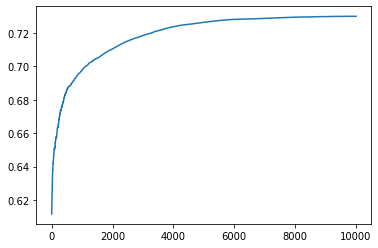

In [105]:
plt.plot(bst['auc-mean'])

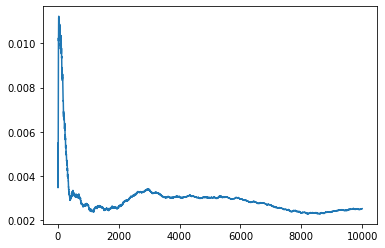

In [106]:
plt.plot(bst['auc-stdv'])

In [108]:
# pca 한 거

# 종족label

# params = {'boosting_type': 'dart', # gbdt, dart, goss
#          'objective': 'binary', 
#          'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
#          'metrics' : 'auc',
#          'verbosity':0}
# bst = lgb.train(params, lgb_train_data,
#                num_boost_round = 5000,
# #                early_stopping_rounds=1000,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
# #                categorical_feature=['species_0','species_1'],
#                verbose_eval=False)



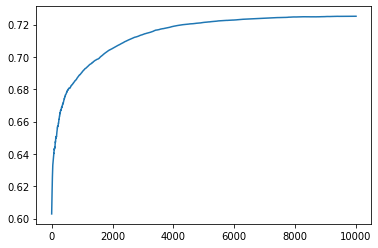

In [125]:
plt.plot(bst['auc-mean'])

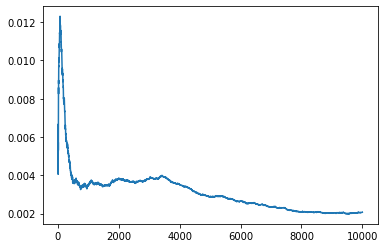

In [126]:
plt.plot(bst['auc-stdv'])

train

In [179]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 10000,
               early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 26min 43s, sys: 24 s, total: 27min 7s
Wall time: 7min 15s


8:2 valid 결과

In [140]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)


# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7208455064454038


8:2 valid 있는걸로 train한걸로 예측해서 던져보기

In [ ]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

In [ ]:
0.72쯤 나왔음..

전체 데이터로 간다

In [181]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8843444630002588


오오 0.6439..!!

최고성적 한번 더

In [94]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 10000,
               early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 25min 58s, sys: 19.1 s, total: 26min 17s
Wall time: 6min 58s


In [118]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8843444630002588


In [139]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 5000,
               early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 12min 30s, sys: 2.3 s, total: 12min 32s
Wall time: 3min 11s


In [140]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8214195071171772


마른수건 짠다..

In [205]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
         'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 10000,
#                early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 25min 30s, sys: 6.83 s, total: 25min 37s
Wall time: 6min 35s


In [206]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8835041516516462


0.6429 약간 줄어들었음

In [226]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
#          'max_depth' : 20,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
#                valid_sets=[lgb_valid_data],
               num_boost_round = 50000,
#                early_stopping_rounds=500,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['map_0','map_1','species_0','species_1'],
               verbose_eval=False)

CPU times: user 1h 54min 34s, sys: 24.8 s, total: 1h 54min 59s
Wall time: 29min 22s


In [227]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.9969950524306224


0.6171.. 역시 오버피팅 되면 떨어지는구나

## Bayesian Optimizer

In [94]:
from bayes_opt import BayesianOptimization

In [99]:
X_train

,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99,duration,species_0,map_0,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,species_1,map_1,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,Adept,Archon,Baneling,Banshee,Battlecruiser,BroodLord,Carrier,Colossus,Corruptor,Cyclone,DarkTemplar,Disruptor,Drone,Ghost,Hellion,HighTemplar,Hydralisk,Immortal,Infestor,Interceptor,Liberator,Lurker,Marauder,Marine,Medivac,Mothership,MothershipCore,Mutalisk,Nuke,Observer,Oracle,Overlord,Overseer,Phoenix,Probe,Queen,Ravager,Raven,Reaper,Roach,SCV,Sentry,SiegeTank,Stalker,SwarmHost,Tempest,Thor,Ultralisk,Viking,Viper,VoidRay,WarpPrism,WidowMine,Zealot,Zergling,Adept.1,Archon.1,Baneling.1,Banshee.1,Battlecruiser.1,BroodLord.1,Carrier.1,Colossus.1,Corruptor.1,Cyclone.1,DarkTemplar.1,Disruptor.1,Drone.1,Ghost.1,Hellion.1,HighTemplar.1,Hydralisk.1,Immortal.1,Infestor.1,Interceptor.1,Liberator.1,Lurker.1,Marauder.1,Marine.1,Medivac.1,Mothership.1,MothershipCore.1,Mutalisk.1,Nuke.1,Observer.1,Oracle.1,Overlord.1,Overseer.1,Phoenix.1,Probe.1,Queen.1,Ravager.1,Raven.1,Reaper.1,Roach.1,SCV.1,Sentry.1,SiegeTank.1,Stalker.1,SwarmHost.1,Tempest.1,Thor.1,Ultralisk.1,Viking.1,Viper.1,VoidRay.1,WarpPrism.1,WidowMine.1,Zealot.1,Zergling.1,player0_near0,player0_near1,player1_near1,player1_near0,player0_click_near0,player0_click_near1,player1_click_near1,player1_click_near0
0,13,6,2,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,8,2,2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.22,1.00,1.00,13.00,15.00,2.00,0.00,16.00,775.00,125.00,1.00,1.00,11.00,11.00,2.00,3.00,17.00,850.00,250.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,406.00,37.00,423.00,0.00,22.00,13.00,28.00,0.00
1,31,2,5,0,4,2,0,0,0,1,2,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,12,3,3,1,0,1,0,1,1,0,0,1,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.54,2.00,4.00,37.00,23.00,4.00,2.00,42.00,2200.00,625.00,1.00,4

In [95]:
lgb_train_data = lgb.Dataset(X_train, label=y_train)

def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth):
    # lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

    params = {'boosting_type': 'dart', # gbdt, dart, goss
             'objective': 'binary', 
             'learning_rate' : 0.05,
             'num_boost_round' : 500,
#              'scale_pos_weight' : 1.1,
             'metrics' : 'auc',
             'categorical_feature' : ['map_0','map_1','species_0','species_1'],
             'verbosity' : 0}
    
    params['num_leaves'] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))

    bst = lgb.cv(params, 
                 lgb_train_data
                   )
    
    return max(bst['auc-mean'])

In [96]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                        'feature_fraction': (0.1, 0.9),
                                        'bagging_fraction': (0.8, 1),
                                        'max_depth': (5, 8.99)}, random_state=0)

In [ ]:
lgbBO.maximize(n_iter=25)

In [ ]:
def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    params = {'application':'binary',
              'num_iterations': 500 , 
              'learning_rate':0.05, 
              'early_stopping_round':100,
              "objective" : "binary",
              "num_threads" : 20 ,
             }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight
    cv_result = lgb.cv(params, d_train,
                       nfold=n_folds, seed=random_seed, 
                       stratified=True, verbose_eval =200, 
                       metrics=["None"], 
                       feval=lgb_f1_score
                      )
    return max(cv_result['f1-mean'])

In [ ]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                        'feature_fraction': (0.1, 0.9),
                                        'bagging_fraction': (0.8, 1),
                                        'max_depth': (5, 8.99),
                                        'lambda_l1': (0, 5),
                                        'lambda_l2': (0, 3),
                                        'min_split_gain': (0.001, 0.1),
                                        'min_child_weight': (5, 50)}, random_state=0)

In [205]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8837745106340278


222

In [200]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7182785940056851


222

In [201]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7248850915124072


222

전체 데이터

In [158]:
%%time

# %%time
# lgb_train_data = lgb.Dataset(X_train, label=y_train)

# params = {'boosting_type': 'dart', # gbdt, dart, goss
#          'objective': 'binary', 
#          'learning_rate' : 0.005,
#          'max_depth' : 25,
#          'feature_fraction' : 0.8,
#          'scale_pos_weight' : 1.1,
#          'metrics' : 'auc',
#          'verbosity':0}
# bst = lgb.train(params, lgb_train_data,
#                num_boost_round = 10000,
# #                early_stopping_rounds=1000,
#                categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
# #                categorical_feature=['species_0','species_1'],
#                verbose_eval=False)


lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
         'max_depth' : 20,
         'feature_fraction' : 0.8,
         'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
               num_boost_round = 5000,
#                early_stopping_rounds=1000,
               categorical_feature=['map_0','map_1','species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
#                categorical_feature=['species_0','species_1'],
               verbose_eval=False)

CPU times: user 11min 32s, sys: 2.06 s, total: 11min 34s
Wall time: 2min 55s


In [159]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)
222
# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8193641130791784


222

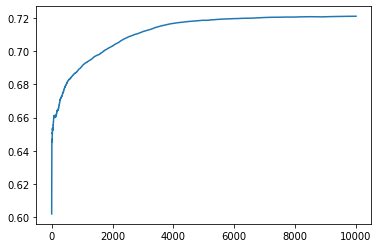

In [127]:
plt.plot(bst['auc-mean'])

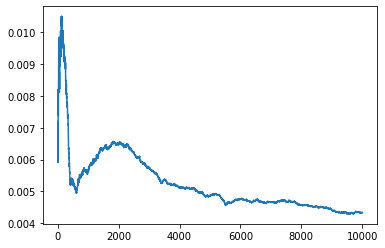

In [128]:
plt.plot(bst['auc-stdv'])

In [107]:
pd.DataFrame(zip(bst.feature_name(), bst.feature_importance())).sort_values(1, ascending=False)[:15]

AttributeError: 'dict' object has no attribute 'feature_name'

label, dart, 5000, 8:2

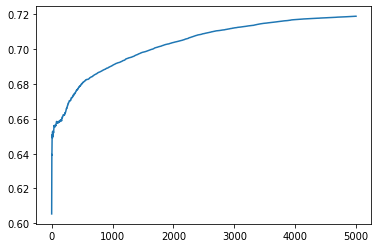

In [1258]:
plt.plot(bst['auc-mean'])

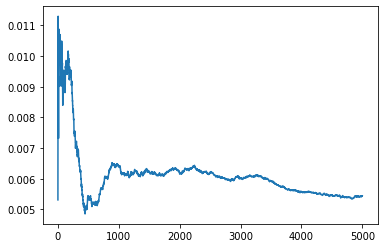

In [1259]:
plt.plot(bst['auc-stdv'])

ratio, gbdt, 5000, 1000

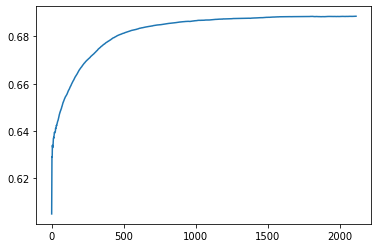

In [1184]:
plt.plot(bst['auc-mean'])

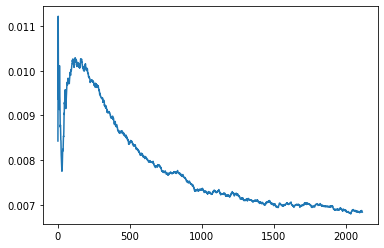

In [1185]:
plt.plot(bst['auc-stdv'])

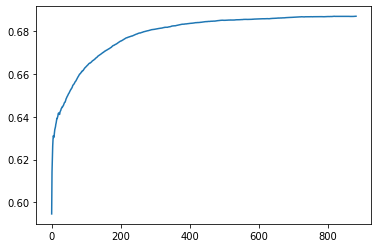

In [647]:
plt.plot(bst['auc-mean'])

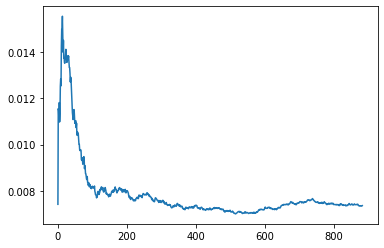

In [648]:
plt.plot(bst['auc-stdv'])

split

In [1065]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

learning_rate = 0.01
params = {'boosting_type': 'gbdt', # dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.01,
         'max_depth' : 20,
         'feature_fraction' : 0.8,
         'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
               num_boost_round = 5000,
               early_stopping_rounds=1000,
#                categorical_feature=['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['species_0','species_1'],
               valid_sets=[lgb_valid_data],
               verbose_eval=False)

CPU times: user 1min 9s, sys: 1min 7s, total: 2min 16s
Wall time: 42.4 s


전체 데이터

In [1265]:
%%time
lgb_train_data = lgb.Dataset(X_train, label=y_train)
# lgb_valid_data = lgb.Dataset(X_valid, label=y_valid)

params = {'boosting_type': 'dart', # gbdt, dart, goss
         'objective': 'binary', 
         'learning_rate' : 0.005,
         'max_depth' : 20,
         'feature_fraction' : 0.8,
         'scale_pos_weight' : 1.1,
         'metrics' : 'auc',
         'verbosity':0}
bst = lgb.train(params, lgb_train_data,
               num_boost_round = 5000,
#                early_stopping_rounds=1000,
#                categorical_feature=['species0_T','species0_P','species0_Z','species1_T','species1_P','species1_Z'],
               categorical_feature=['species_0','species_1'],
               verbose_eval=False)


CPU times: user 11min 39s, sys: 2min 4s, total: 13min 44s
Wall time: 3min 27s


hyper_parameter 조절

In [1266]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)
222
# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.8191040384857772


### 4.1.1. Learning

In [509]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.6209225867977994


In [532]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.6343635826079046


In [566]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7067524070588329


In [635]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7240740636690508


4개 합체

In [989]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7204734370022937


ability + unit

In [161]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.6290210010825246


4개 합체 + unit

In [181]:
predict_test = bst.predict(X_test)

auc = roc_auc_score(y_test, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7155644569162345


4개 합체 + unit (전체 데이터)

In [188]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.7213772075206891


4개 합체 + unit (진짜 전체 데이터)

In [507]:
predict_test = bst.predict(X_train)

auc = roc_auc_score(y_train, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

0.9999802545025988


learning rate 조절

In [1260]:
predict_test = bst.predict(X_valid)

auc = roc_auc_score(y_valid, predict_test)
print(auc)

# bst.save_model(os.path.join(data_folder,'baseline_0303.model'))

AttributeError: 'dict' object has no attribute 'predict'

##### feature importance

In [95]:
pd.DataFrame(zip(bst.feature_name(), bst.feature_importance())).sort_values(1, ascending=False)

,0,1
1,p0_u1,11598
204,build_sum_0,10361
101,p1_u1,10195
213,build_sum_1,9671
100,p1_u0,8590
331,player1_near1,8432
217,minerals_1,8287
208,minerals_0,8240
0,p0_u0,7901
329,player0_near0,7650


### 4.1.2. Predict

#### > test_df에서 누락된 game_id 추가 (feature를 null로 하는 방식)

In [1268]:
print('[n_of_game_id]')
print('train_df: ', len(train_df.game_id.unique()))
print('train_ability_feature_df: ', len(train_final_ftr_df.game_id.unique()))
print('test_df: ', len(test_df.game_id.unique()))
print('test_ability_feature_df: ', len(test_final_ftr_df.game_id.unique()))

[n_of_game_id]
train_df:  38872
train_ability_feature_df:  38872
test_df:  16787
test_ability_feature_df:  16787


In [512]:
test_game_id_df = pd.DataFrame(test_df.game_id.unique(), columns=['game_id'])
test_final_ftr_df = test_game_id_df.merge(test_final_ftr_df, how='left')

In [513]:
print('[n_of_game_id]')
print('train_df: ', len(train_df.game_id.unique()))
print('train_ability_feature_df: ', len(train_final_ftr_df.game_id.unique()))
print('test_df: ', len(test_df.game_id.unique()))
print('test_ability_feature_df: ', len(test_final_ftr_df.game_id.unique()))

[n_of_game_id]
train_df:  38872
train_ability_feature_df:  38872
test_df:  16787
test_ability_feature_df:  16787


In [514]:
test_final_ftr_df.head()

,game_id,p0_u0,p0_u1,p0_u2,p0_u3,p0_u4,p0_u5,p0_u6,p0_u7,p0_u8,p0_u9,p0_u10,p0_u11,p0_u12,p0_u13,p0_u14,p0_u15,p0_u16,p0_u17,p0_u18,p0_u19,p0_u20,p0_u21,p0_u22,p0_u23,p0_u24,p0_u25,p0_u26,p0_u27,p0_u28,p0_u29,p0_u30,p0_u31,p0_u32,p0_u33,p0_u34,p0_u35,p0_u36,p0_u37,p0_u38,p0_u39,p0_u40,p0_u41,p0_u42,p0_u43,p0_u44,p0_u45,p0_u46,p0_u47,p0_u48,p0_u49,p0_u50,p0_u51,p0_u52,p0_u53,p0_u54,p0_u55,p0_u56,p0_u57,p0_u58,p0_u59,p0_u60,p0_u61,p0_u62,p0_u63,p0_u64,p0_u65,p0_u66,p0_u67,p0_u68,p0_u69,p0_u70,p0_u71,p0_u72,p0_u73,p0_u74,p0_u75,p0_u76,p0_u77,p0_u78,p0_u79,p0_u80,p0_u81,p0_u82,p0_u83,p0_u84,p0_u85,p0_u86,p0_u87,p0_u88,p0_u89,p0_u90,p0_u91,p0_u92,p0_u93,p0_u94,p0_u95,p0_u96,p0_u97,p0_u98,p0_u99,p1_u0,p1_u1,p1_u2,p1_u3,p1_u4,p1_u5,p1_u6,p1_u7,p1_u8,p1_u9,p1_u10,p1_u11,p1_u12,p1_u13,p1_u14,p1_u15,p1_u16,p1_u17,p1_u18,p1_u19,p1_u20,p1_u21,p1_u22,p1_u23,p1_u24,p1_u25,p1_u26,p1_u27,p1_u28,p1_u29,p1_u30,p1_u31,p1_u32,p1_u33,p1_u34,p1_u35,p1_u36,p1_u37,p1_u38,p1_u39,p1_u40,p1_u41,p1_u42,p1_u43,p1_u44,p1_u45,p1_u46,p1_u47,p1_u48,p1_u49,p1_u50,p1_u51,p1_u52,p1_u53,p1_u54,p1_u55,p1_u56,p1_u57,p1_u58,p1_u59,p1_u60,p1_u61,p1_u62,p1_u63,p1_u64,p1_u65,p1_u66,p1_u67,p1_u68,p1_u69,p1_u70,p1_u71,p1_u72,p1_u73,p1_u74,p1_u75,p1_u76,p1_u77,p1_u78,p1_u79,p1_u80,p1_u81,p1_u82,p1_u83,p1_u84,p1_u85,p1_u86,p1_u87,p1_u88,p1_u89,p1_u90,p1_u91,p1_u92,p1_u93,p1_u94,p1_u95,p1_u96,p1_u97,p1_u98,p1_u99,duration,train_sum_0,build_sum_0,upgrade_sum_0,attack_sum_0,supply_0,minerals_0,gas_0,train_sum_1,build_sum_1,upgrade_sum_1,attack_sum_1,supply_1,minerals_1,gas_1,species0_T,species0_P,species0_Z,species1_T,species1_P,species1_Z,player0_near0,player0_near1,player1_near1,player1_near0,player0_click_near0,player0_click_near1,player1_click_near1,player1_click_near0
0,38872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,16,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,7.05,14.00,8.00,1.00,5.00,15.00,775.00,150.00,17.00,16.00,1.00,2.00,20.00,975.00,150.00,0.00,1.00,0.00,0.00,1.00,0.00,201.00,24.00,239.00,206.00,175.00,60.00,51.00,70.00
1,38873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.06,18.00,5.00,1.00,0.00,14.00,1450.00,0.00,17.00,11.00,0.00,0.00,21.00,1025.00,250.00,0.00,0.00,1.00,0.00,1.00,0.00,134.00,18.00,130.00,13.00,6.00,6.00,50.00,50.00
2,38874,16,0,1,1,1,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,1,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.27,12.00,7.00,1.00,9.00,14.00,700.00,250.00,6.00,8.00,1.00,4.00,10.00,500.00,100.00,1.00,0.00,0.00,1.00,0.00,0.00,165.00,45.00,177.00,0.00,25.00,41.00,83.00,1.00
3,38875,20,4,2,2,1,4,1,0,1,1,0,0,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,46,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,7.52,29.00,20.00,4.00,13.00,37.00,1825.00,450.00,26.00,11.00,2.00,17.00,28.00,1450.00,275.00,1.00,0.00,0.00

##### Predict

In [1269]:
_ftr = test_final_ftr_df.columns.tolist()
_ftr.remove('game_id')

In [1270]:
predict_test = bst.predict(test_final_ftr_df[_ftr])

In [1271]:
predict_test

array([0.69032253, 0.66141168, 0.4204645 , ..., 0.75086031, 0.57219337,
       0.5531266 ])

In [1272]:
temp_game_id = test_ability_feature_df[['game_id']].reset_index()
temp_winner = pd.DataFrame(predict_test).rename(columns={0:'winner'}).reset_index()

result_df = temp_game_id.merge(temp_winner).drop('index', axis='columns')

In [1273]:
result_df.head()

,game_id,winner
0,38872,0.69
1,38873,0.66
2,38874,0.42
3,38875,0.25
4,38876,0.48


In [1274]:
result_df.shape

(16717, 2)

#### > test_df에서 누락된 game_id 추가 (null인 game_id의 winner는 0.5로)

##### Predict

In [121]:
_ftr = test_final_ftr_df.columns.tolist()
_ftr.remove('game_id')

In [122]:
predict_test = bst.predict(test_final_ftr_df[_ftr])

In [123]:
predict_test

array([0.82310227, 0.81386743, 0.3776873 , ..., 0.86103228, 0.54014423,
       0.60419683])

In [124]:
print('[n_of_game_id]')
# print('train_df: ', len(train_df.game_id.unique()))
# print('train_ability_feature_df: ', len(train_final_ftr_df.game_id.unique()))
# print('test_df: ', len(test_df.game_id.unique()))
print('predict_test: ', len(predict_test))

[n_of_game_id]
predict_test:  16787


In [125]:
predict_test_df = pd.DataFrame(predict_test).reset_index().rename(columns={0:'winner'})

In [126]:
test_game_id_df = test_final_ftr_df[['game_id']].reset_index()

In [127]:
# test_game_id_df

In [128]:
predict_test_small_df = test_game_id_df.merge(predict_test_df, how='inner', on='index').drop('index', axis='columns')

In [129]:
# predict_test_small_df

In [130]:
print('[n_of_game_id]')
# print('train_df: ', len(train_df.game_id.unique()))
# print('train_ability_feature_df: ', len(train_final_ftr_df.game_id.unique()))
# print('test_df: ', len(test_df.game_id.unique()))
print('predict_test_small_df: ', len(predict_test_small_df))

[n_of_game_id]
predict_test_small_df:  16787


In [131]:
original_test_game_id_df = pd.DataFrame(test_df.game_id.unique(), columns=['game_id'])

In [132]:
# original_test_game_id_df

In [133]:
result_df = original_test_game_id_df.merge(predict_test_small_df, how='left', on='game_id').fillna(0.5)

In [134]:
result_df.head()

,game_id,winner
0,38872,0.82
1,38873,0.81
2,38874,0.38
3,38875,0.19
4,38876,0.47


In [135]:
result_df.shape

(16787, 2)

In [136]:
result_df[result_df['winner'] == 0.5]

,game_id,winner


## 4.2. Random Forest Model

In [462]:
df = train_final_ftr_df

# train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)
# train_data, valid_data = train_test_split(train_data, test_size=0.4, random_state=2)

train_data, valid_data = train_test_split(df, test_size=0.3, random_state=2)

print('train_data: ',train_data.shape)
print('valid_data: ',valid_data.shape)
# print('test_data: ',test_data.shape)

train_data:  (27210, 231)
valid_data:  (11662, 231)


In [463]:
_ftr = train_final_ftr_df.columns.tolist()
_ftr.remove('game_id')
_ftr.remove('winner')

In [464]:
len(_ftr)

229

In [465]:
# X_train, y_train = train_data[_ftr], train_data['winner']
# X_valid, y_valid = valid_data[_ftr], valid_data['winner']
# X_test, y_test = test_data[_ftr], test_data['winner']

X_train, y_train = train_data[_ftr], train_data['winner']
X_valid, y_valid = valid_data[_ftr], valid_data['winner']

### 4.2.1. Learning

##### 최적 max_depth 탐색

In [466]:
%%time
x_list = []
train_score_list = []
valid_score_list = []

for i in range(1,51):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf = clf.fit(X_train, y_train)
    
    x_list.append(i)
    train_score_list.append(clf.score(X_train, y_train))
    valid_score_list.append(clf.score(X_valid, y_valid))

CPU times: user 4min 46s, sys: 3.69 s, total: 4min 49s
Wall time: 4min 51s


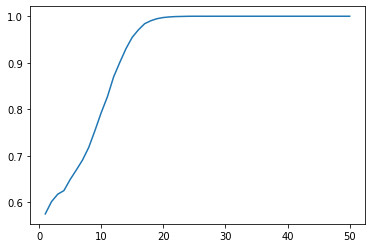

In [467]:
plt.plot(x_list, train_score_list)

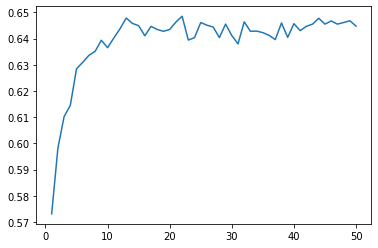

In [468]:
plt.plot(x_list, valid_score_list)

##### 최적 max_depth로 학습

전체 데이터 가져오기

In [469]:
_ftr = train_final_ftr_df.columns.tolist()
_ftr.remove('game_id')
_ftr.remove('winner')

In [470]:
X_train, y_train = train_final_ftr_df[_ftr], train_final_ftr_df['winner']

전체 데이터로 학습

In [471]:
clf = RandomForestClassifier(max_depth=14, random_state=0)
clf = clf.fit(X_train, y_train)

In [472]:
clf.score(X_train, y_train)

0.912687795842766

### 4.2.2. Predict

In [483]:
_ftr = test_final_ftr_df.columns.tolist()
_ftr.remove('game_id')

In [484]:
predict_test = clf.predict(test_final_ftr_df[_ftr])

In [485]:
predict_test

array([1., 1., 0., ..., 1., 1., 1.])

In [527]:
print('[n_of_game_id]')
# print('train_df: ', len(train_df.game_id.unique()))
# print('train_ability_feature_df: ', len(train_final_ftr_df.game_id.unique()))
print('test_df: ', len(test_df.game_id.unique()))
print('predict_test: ', len(predict_test))

[n_of_game_id]
test_df:  16787
predict_test:  16787


In [489]:
predict_test_df = pd.DataFrame(predict_test).reset_index().rename(columns={0:'winner'})

In [490]:
# predict_test_df

In [491]:
test_game_id_df = test_final_ftr_df[['game_id']].reset_index()

In [492]:
# test_game_id_df

In [493]:
predict_test_small_df = test_game_id_df.merge(predict_test_df, how='inner', on='index').drop('index', axis='columns')

In [494]:
# predict_test_small_df

In [496]:
original_test_game_id_df = pd.DataFrame(test_df.game_id.unique(), columns=['game_id'])

In [497]:
# original_test_game_id_df

In [498]:
result_df = original_test_game_id_df.merge(predict_test_small_df, how='left', on='game_id').fillna(0.5)

In [499]:
result_df.head()

,game_id,winner
0,38872,1.00
1,38873,1.00
2,38874,0.00
3,38875,0.00
4,38876,0.00


In [115]:
result_df.shape

(16787, 2)

(array([ 183.,  801., 1304., 1749., 2223., 2635., 2898., 2468., 1844.,
         682.]),
 array([0.00630336, 0.10222978, 0.1981562 , 0.29408262, 0.39000905,
        0.48593547, 0.58186189, 0.67778831, 0.77371473, 0.86964115,
        0.96556757]),
 <a list of 10 Patch objects>)

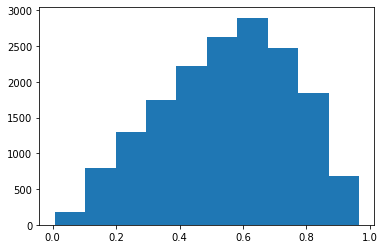

In [137]:
plt.hist(result_df.winner)

# Output

In [138]:
result_df.to_csv('submission_baseline_0323_3.csv', index=False)

# EDA

In [49]:
terran_ability_list = sorted(terran_ability_df.event_contents.map(lambda x: x.split(';')[0]).unique())
protoss_ability_list = sorted(protoss_ability_df.event_contents.map(lambda x: x.split(';')[0]).unique())
zerg_ability_list = sorted(zerg_ability_df.event_contents.map(lambda x: x.split(';')[0]).unique())

- Build
- Train
- Upgrade
- Research
- Attack

In [54]:
terran_ability_list

['(1000) - SCVRepair',
 '(1020) - BuildCommandCenter',
 '(1021) - BuildSupplyDepot',
 '(1022) - BuildRefinery',
 '(1023) - BuildBarracks',
 '(1024) - BuildEngineeringBay',
 '(1025) - BuildMissileTurret',
 '(1026) - BuildBunker',
 '(1028) - BuildSensorTower',
 '(1029) - BuildGhostAcademy',
 '(102A) - BuildFactory',
 '(102B) - BuildStarport',
 '(102D) - BuildArmory',
 '(102F) - BuildFusionCore',
 '(103E) - CancelTerranBuilding',
 '(1060) - UseStimpack',
 '(1080) - CloakGhost',
 '(1081) - DecloakGhost',
 '(10C0) - HealMedivac',
 '(10E0) - SiegeMode',
 '(1100) - TankMode',
 '(1120) - CloakBanshee',
 '(1121) - DecloakBanshee',
 '(1140) - LoadTargetMedivac',
 '(1142) - UnloadTargetMedivac',
 '(1143) - UnloadUnitMedivac',
 '(1160) - ScannerSweep',
 '(1180) - YamatoGun',
 '(11A0) - AssaultMode',
 '(11C0) - FighterMode',
 '(11E0) - LoadTargetBunker',
 '(11E1) - UnloadAllBunker',
 '(11E3) - UnloadUnitBunker',
 '(1201) - UnloadAllCommandCenter',
 '(1203) - UnloadUnitCommandCenter',
 '(1204) - Loa

- Build
- Train
- Warp
- Upgrade
- Research
- Attack

In [55]:
protoss_ability_list

['(1540) - BuildNexus',
 '(1541) - BuildPylon',
 '(1542) - BuildAssimilator',
 '(1543) - BuildGateway',
 '(1544) - BuildForge',
 '(1545) - BuildFleetBeacon',
 '(1546) - BuildTwilightCouncil',
 '(1547) - BuildPhotonCannon',
 '(1549) - BuildStargate',
 '(154A) - BuildTemplarArchive',
 '(154B) - BuildDarkShrine',
 '(154C) - BuildRoboticsBay',
 '(154D) - BuildRoboticsFacility',
 '(154E) - BuildCyberneticsCore',
 '(1560) - LoadTarget',
 '(1562) - UnloadTargetWarpPrism',
 '(1563) - UnloadUnitWarpPrism',
 '(1580) - TrainZealot',
 '(1581) - TrainStalker',
 '(1583) - TrainHighTemplar',
 '(1584) - TrainDarkTemplar',
 '(1585) - TrainSentry',
 '(1586) - TrainAdept',
 '(15A0) - TrainPhoenix',
 '(15A2) - TrainCarrier',
 '(15A4) - TrainVoidRay',
 '(15A8) - TrainOracle',
 '(15A9) - TrainTempest',
 '(15C0) - TrainWarpPrism',
 '(15C1) - TrainObserver',
 '(15C2) - TrainColossus',
 '(15C3) - TrainImmortal',
 '(15D2) - TrainDisruptor',
 '(15E0) - TrainProbe',
 '(1600) - PsionicStorm',
 '(1660) - TrainInter

- Build
- Train
- Morph
- Evolve
- Upgrade
- Research
- Attack

In [48]:
len(zerg_ability_list)

NameError: name 'zerg_ability_list' is not defined

In [56]:
zerg_ability_list

['(16E0) - BuildHatchery',
 '(16E2) - BuildExtractor',
 '(16E3) - BuildSpawningPool',
 '(16E4) - BuildEvolutionChamber',
 '(16E5) - BuildHydraliskDen',
 '(16E6) - BuildSpire',
 '(16E7) - BuildUltraliskCavern',
 '(16E8) - BuildInfestationPit',
 '(16E9) - BuildNydusNetwork',
 '(16EA) - BuildBanelingNest',
 '(16ED) - BuildRoachWarren',
 '(16EE) - BuildSpineCrawler',
 '(16EF) - BuildSporeCrawler',
 '(1700) - Gather',
 '(1701) - ReturnCargo',
 '(1720) - ResearchZergMeleeWeaponsLevel1',
 '(1721) - ResearchZergMeleeWeaponsLevel2',
 '(1723) - ResearchZergGroundArmorsLevel1',
 '(1724) - ResearchZergGroundArmorsLevel2',
 '(1726) - ResearchZergMissileWeaponsLevel1',
 '(1727) - ResearchZergMissileWeaponsLevel2',
 '(1740) - UpgradeToLair',
 '(1741) - CancelUpgradeToLair',
 '(1760) - UpgradeToHive',
 '(1761) - CancelUpgradeToHive',
 '(1780) - MorphToGreaterSpire',
 '(17A1) - EvolvePneumatizedCarapace',
 '(17A3) - EvolveBurrow',
 '(17C0) - EvolveAdrenalGlands',
 '(17C1) - EvolveMetabolicBoost',
 '(17

인구수 계산 로직을 만들어봐야겠다
- 인구수 건물로
- 유닛으로 
- (취소 고려)
- 파괴되거나 죽은건 고려 안함

In [89]:
ability_location = train_ability_df.event_contents.map(lambda x: x.split(';')).map(lambda x: x[-1].split(': ')[-1] if len(x) > 1 else None)
# protoss_ability_list = sorted(protoss_ability_df.event_contents.map(lambda x: x.split(';')[0]).unique())
# zerg_ability_list = sorted(zerg_ability_df.event_contents.map(lambda x: x.split(';')[0]).unique())

ability_location_df = pd.DataFrame(ability_location.dropna()).rename(columns={'event_contents': 'location'})

ability_location_df.to_csv(os.path.join(data_folder,'ability_location.csv'),index=False)

In [67]:
pd.DataFrame(aaa).head(1000)

,event_contents
0,[(1360) - TrainSCV]
1,"[(1021) - BuildSupplyDepot, Location: (135.0, 42.0, 49119)]"
2,[(480) - Stop]
3,[(1360) - TrainSCV]
4,[(1360) - TrainSCV]
5,"[(1021) - BuildSupplyDepot, Location: (28.0, 148.0, 49127)]"
6,"[(1022) - BuildRefinery, Target: CreepOnlyBlocker4x4 [024C0001], Location: (27.5, 154.5, 49120)]"
7,[(1360) - TrainSCV]
8,"[(1023) - BuildBarracks, Location: (135.5, 39.5, 49133)]"
9,[(1360) - TrainSCV]


# Outlier

- 게임 시작 후 1분 이상 ability에 해당하는 아무런 행동도 하지 않음

In [65]:
train_ability_df[['game_id','time']].groupby('game_id').min().sort_values('time', ascending=False)

,time
game_id,
18856,1.23
4381,1.19
32694,1.15
21246,1.13
21604,1.10
...,...
12739,0.00
12740,0.00
35066,0.00


-

In [92]:
train_ability_df[train_ability_df.event_contents.str.contains('Lair')].sort_values('time').head(20)

,game_id,winner,time,player,species,event,event_contents
1453652,14892,0,0.12,1,Z,Ability,"(5A0) - Attack; Target: Lair [036C0001]; Location: (125.5, 30.5, 49136)"
595077,6150,0,0.13,0,Z,Ability,"(D41) - SetWorkerRally; Target: Lair [03100001]; Location: (149.5, 23.5, 49120)"
2848724,29208,0,0.14,0,Z,Ability,"(4C3) - ScanMove; Target: Lair [02DC0001]; Location: (24.5, 83.5, 49120)"
1798387,18438,0,0.16,1,Z,Ability,"(D41) - SetWorkerRally; Target: Lair [03440001]; Location: (161.5, 21.5, 49088)"
786929,8060,1,0.21,0,Z,Ability,"(D40) - SetUnitRally; Target: Lair [03100001]; Location: (161.5, 21.5, 49088)"
2537208,25980,1,0.21,0,Z,Ability,"(D41) - SetWorkerRally; Target: Lair [02DC0001]; Location: (24.5, 83.5, 49120)"
3527947,36135,1,0.21,0,Z,Ability,"(D41) - SetWorkerRally; Target: Lair [02DC0001]; Location: (24.5, 83.5, 49120)"
3520861,36062,1,0.22,1,Z,Ability,"(4C3) - ScanMove; Target: Lair [036C0001]; Location: (26.5, 137.5, 49136)"
61832,631,1,0.26,0,Z,Ability,"(4C0) - Move; Target: Lair [03080001]; Location: (143.5, 24.5, 49120)"
3072903,31483,1,0.37,0,Z,Ability,"(4C0) - Move; Target: Lair [03100001]; Location: (150.5, 142.5, 49120)"


In [1115]:
# 각 종족 ability 만들기

# terran_ability_df = train_ability_df[(train_ability_df['species'] == 'T')]
# terran_ability_df.to_csv(os.path.join(data_folder,'terran_ability.csv'),index=False)

# protoss_ability_df = train_ability_df[(train_ability_df['species'] == 'P')]
# protoss_ability_df.to_csv(os.path.join(data_folder,'protoss_ability.csv'),index=False)

# zerg_ability_df = train_ability_df[(train_ability_df['species'] == 'Z')]
# zerg_ability_df.to_csv(os.path.join(data_folder,'zerg_ability.csv'),index=False)

In [1116]:
# train_terran_ability_df = pd.read_csv(os.path.join(data_folder,'terran_ability.csv'))
# train_protoss_ability_df = pd.read_csv(os.path.join(data_folder,'protoss_ability.csv'))
# train_zerg_ability_df = pd.read_csv(os.path.join(data_folder,'zerg_ability.csv'))

In [1117]:
# print(terran_ability_df.shape)
# print(protoss_ability_df.shape)
# print(zerg_ability_df.shape)

In [1227]:
# 각 종족별 event 쪼개기

# terran_ability_df['event_contents_1'] = terran_ability_df.event_contents.map(lambda x: x.split(';')[0])

# terran_ability_df['event_contents_1_name'] = terran_ability_df.event_contents_1.map(lambda x: x.split('- ')[-1])

# terran_ability_df['event_contents_1_train'] =  terran_ability_df['event_contents_1_name'].str.contains('Train')
# terran_ability_df['event_contents_1_build'] =  terran_ability_df['event_contents_1_name'].str.contains('Build')
# terran_ability_df['event_contents_1_upgrade'] =  terran_ability_df['event_contents_1_name'].str.contains('Upgrade')
# terran_ability_df['event_contents_1_research'] =  terran_ability_df['event_contents_1_name'].str.contains('Research')
# terran_ability_df['event_contents_1_attack'] =  terran_ability_df['event_contents_1_name'].str.contains('Attack')